# Flight Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from tabulate import tabulate
from datetime import datetime

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Shape and type of the data

In [3]:
# Reading the csv
flight_data = pd.read_csv('../data/flights.csv', low_memory=False)

# Display all rows and columns
pd.set_option('display.max_columns', 110)
pd.set_option('display.max_rows', 110)

# Printing the shape
print('Shape of the data     ',flight_data.shape)

Shape of the data      (1099444, 110)


In [4]:
print('*************** Data Types')
print(flight_data.dtypes)

*************** Data Types
year                                 int64
quarter                              int64
month                                int64
dayofmonth                           int64
dayofweek                            int64
flightdate                          object
reporting_airline                   object
dot_id_reporting_airline             int64
iata_code_reporting_airline         object
tail_number                         object
flight_number_reporting_airline      int64
originairportid                      int64
originairportseqid                   int64
origincitymarketid                   int64
origin                              object
origincityname                      object
originstate                         object
originstatefips                      int64
originstatename                     object
originwac                            int64
destairportid                        int64
destairportseqid                     int64
destcitymarketid           

In [5]:
flight_data.head(10)

,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,tail_number,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatefips,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,deptimeblk,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,cancelled,cancellationcode,diverted,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,firstdeptime,totaladdgtime,longestaddgtime,divairportlandings,divreacheddest,divactualelapsedtime,divarrdelay,divdistance,div1airport,div1airportid,div1airportseqid,div1wheelson,div1totalgtime,div1longestgtime,div1wheelsoff,div1tailnum,div2airport,div2airportid,div2airportseqid,div2wheelson,div2totalgtime,div2longestgtime,div2wheelsoff,div2tailnum,div3airport,div3airportid,div3airportseqid,div3wheelson,div3totalgtime,div3longestgtime,div3wheelsoff,div3tailnum,div4airport,div4airportid,div4airportseqid,div4wheelson,div4totalgtime,div4longestgtime,div4wheelsoff,div4tailnum,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,empty_col
0,2021,4,12,8,3,2021-12-08,OH,20397,OH,N522AE,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1811.0,-3.0,0.0,0.0,-1.0,1800-1859,12.0,1823.0,1917.0,14.0,1939,1931.0,-8.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,85.0,80.0,54.0,1.0,221.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,4,12,9,4,2021-12-09,OH,20397,OH,N529EA,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1803.0,-11.0,0.0,0.0,-1.0,1800-1859,21.0,1824.0,1928.0,6.0,1939,1934.0,-5.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,85.0,91.0,64.0,1.0,221.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,4,12,10,5,2021-12-10,OH,20397,OH,N500AE,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1812.0,-2.0,0.0,0.0,-1.0,1800-1859,27.0,1839.0,1933.0,6.0,1939,1939.0,0.0,0.0,0.0,0.0,1900-1959,0.0,NaN,0.0,85.0,87.0,54.0,1.0,221.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,4,12,11,6,2021-12-11,OH,20397,OH,N531EG,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1846.0,32.0,32.0,1.0,2.0,1800-1859,16.0,1902.0,1957.0,7.0,1939,2004.0,25.0,25.0,1.0,1.0,1900-1959,0.0,NaN,0.0,85.0,78.0,55.0,1.0,221.0,1,0.0,0.0,0.0,0.0,25.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,4,12,12,7,2021-12-12,OH,20397,OH,N500AE,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1808.0,-6.0,0.0,0.0,-1.0,1800-1859,15.0,1823.0,1912.0,7.0,1939,1919.0,-20.0,0.0,0.0,-2.0,1900-1959,

## Heatmap - any patterns or trends? (Initial thoughts)

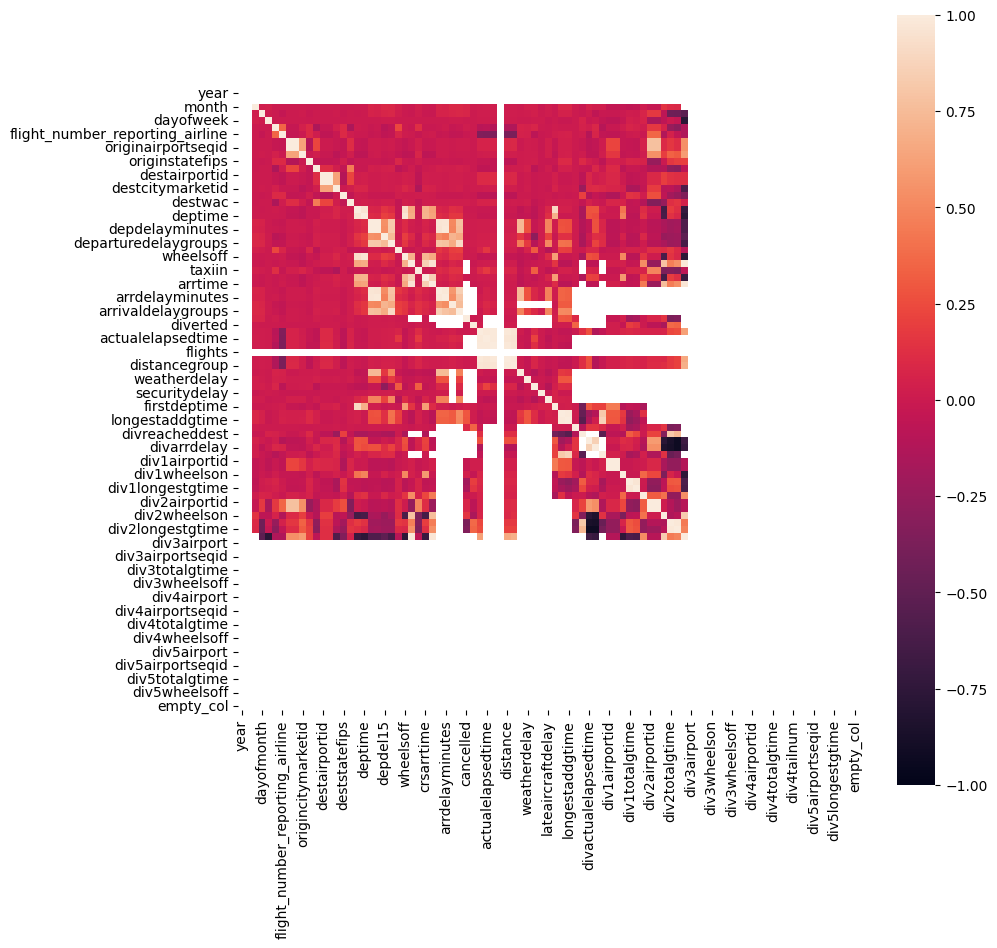

In [6]:
#correlation matrix
numeric_flight_data = flight_data.select_dtypes(include=['number'])
correlation_matrix = numeric_flight_data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
# Plotting heat map
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, square=True);
# Saving image as png
plt.savefig('../graphs/analysis_1.png', bbox_inches='tight')
plt.show()

In [7]:
# Checking unique values. Dataset contains datapoints from 2021 only
unique_dates = flight_data['year'].unique()
print(unique_dates)

[2021]


In [8]:
## Finding number of years, reporting airlines, flight number. Checking out fields
print(flight_data['reporting_airline'].unique())
print(flight_data['dot_id_reporting_airline'].unique())
print(flight_data['flight_number_reporting_airline'].unique())
print(flight_data['tail_number'].unique())

['OH' 'OO' 'UA' 'QX' 'DL' 'F9' 'G4' 'NK' 'HA' 'MQ' 'WN' 'YV' 'YX' '9E'
 'AA' 'AS' 'B6']
[20397 20304 19977 19687 19790 20436 20368 20416 19690 20398 19393 20378
 20452 20363 19805 19930 20409]
[5349 5351 5352 ... 4376 4497 4387]
['N522AE' 'N529EA' 'N500AE' ... 'N26966' 'N78013' 'N73270']


## Sanity checks and Cleaning

In [9]:
# Checking if any of the features required is negative - 
print((flight_data['crsdeptime'] < 0).all())
print((flight_data['deptime'] < 0).all())
print((flight_data['taxiout'] < 0).all())
print((flight_data['taxiin'] < 0).all())
print((flight_data['crsarrtime'] < 0).all())
print((flight_data['arrtime'] < 0).all())
print((flight_data['distance'] < 0).all())
print((flight_data['weatherdelay'] < 0).all())
print((flight_data['nasdelay'] < 0).all())
print((flight_data['securitydelay'] < 0).all())
print((flight_data['lateaircraftdelay'] < 0).all())
print((flight_data['divarrdelay'] < 0).all())
print((flight_data['divdistance'] < 0).all())

False
False
False
False
False
False
False
False
False
False
False
False
False


In [10]:
# Checking null values
print(flight_data.isna().sum())

year                                     0
quarter                                  0
month                                    0
dayofmonth                               0
dayofweek                                0
flightdate                               0
reporting_airline                        0
dot_id_reporting_airline                 0
iata_code_reporting_airline              0
tail_number                           3255
flight_number_reporting_airline          0
originairportid                          0
originairportseqid                       0
origincitymarketid                       0
origin                                   0
origincityname                           0
originstate                              0
originstatefips                          0
originstatename                          0
originwac                                0
destairportid                            0
destairportseqid                         0
destcitymarketid                         0
dest       

In [11]:
# The actual elapsed time and arr delay remains NULL for all diverted flights.
# So, checking whether the actualelapsedtime and arrdelay NULL values are equal
# Also checking if this is similar to the diverted count
print(flight_data['actualelapsedtime'].isna().sum())
print(flight_data['arrdelay'].isna().sum())
print(flight_data['diverted'].sum())
print('Actual missing values for arrdelay  ', flight_data['arrdelay'].isna().sum()-int(flight_data['diverted'].sum()))

18860
18860
2107.0
Actual missing values for arrdelay   16753


In [12]:
# Arriving into the conclusion that dealing with NA values now, may lead to potential data loss 
# Eg: If a flight is cancelled then any delay entry shouldn't be possible
# Also, if a flight is diverted arrival delay entry should be NULL as mentioned in the readme

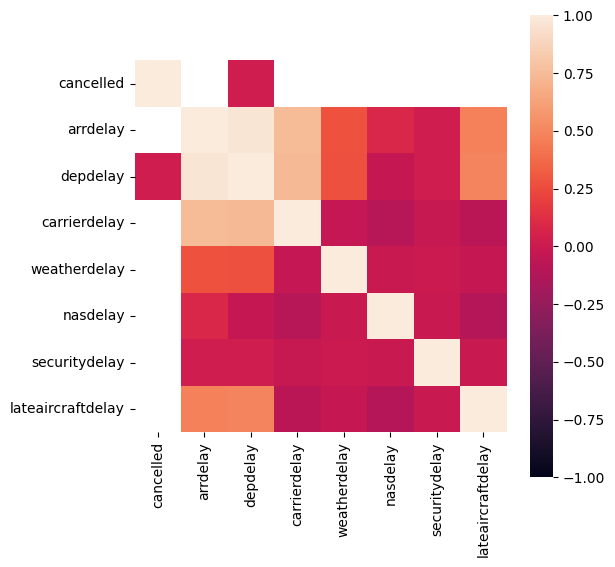

In [13]:
# Cancel vs delay correlation

#correlation matrix
diverted_delay_df = flight_data[['cancelled', 'arrdelay','depdelay','carrierdelay','weatherdelay','nasdelay','securitydelay','lateaircraftdelay']].select_dtypes(include=['number'])
correlation_matrix = diverted_delay_df.corr()
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, square=True);
# Saving the graph as image
plt.savefig('../graphs/analysis_22.png', bbox_inches='tight')
plt.show()

In [14]:
#the heatmap suggest a very strong correlation no correlation between cancelled and diverted with delays

#narrow this problem
cancel_df = flight_data[['cancelled', 'cancellationcode','cancellationcode','arrdelay','depdelay']]
cancel_df = cancel_df[cancel_df['cancelled']==1] #  select only cancelled flights

#explore cancelation data
print(cancel_df)
print('*********************************************')
print(cancel_df.shape)
print(cancel_df.isna().sum()) #sum of NA's

         cancelled cancellationcode cancellationcode  arrdelay  depdelay
81             1.0                A                A       NaN       NaN
99             1.0                A                A       NaN       NaN
183            1.0                B                B       NaN       NaN
225            1.0                A                A       NaN       NaN
246            1.0                B                B       NaN       NaN
...            ...              ...              ...       ...       ...
1099092        1.0                A                A       NaN       NaN
1099188        1.0                A                A       NaN       NaN
1099231        1.0                A                A       NaN       NaN
1099265        1.0                A                A       NaN       NaN
1099441        1.0                A                A       NaN       NaN

[16753 rows x 5 columns]
*********************************************
(16753, 5)
cancelled               0
cancellationcod

In [15]:
# Hence if a flight is cancelled there is no arrival delay entry. Also if a flight is diverted there shouldnt be any arrival delay time
flight_data_v1 = flight_data[flight_data['cancelled']==0]
print(flight_data_v1['arrdelay'].isna().sum())
print(flight_data_v1['depdelay'].isna().sum())
print(flight_data_v1.shape)

2107
0
(1082691, 110)


In [16]:
# Now, out of the remaning 2107 data, it has to be from the diverted flights.

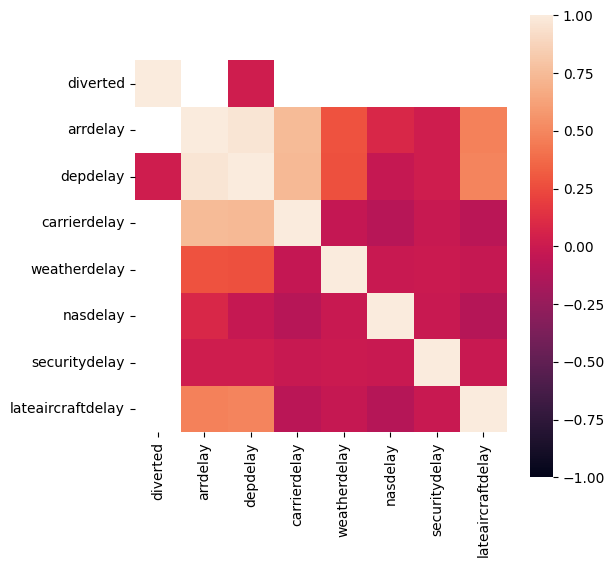

In [17]:
# # Checking correlation map
# # Diverted vs delay correlation
# diverted_delay_df = flight_data[['diverted', 'arrdelay','depdelay','carrierdelay','weatherdelay','nasdelay','securitydelay','lateaircraftdelay']]
# #correlation heatmap (check how cancelations are correlated to delays)
# diverted_delay_hm = sns.heatmap(diverted_delay_df.corr()) #plot the heatmap
# diverted_delay_hm

#correlation matrix
diverted_delay_df = flight_data[['diverted', 'arrdelay','depdelay','carrierdelay','weatherdelay','nasdelay','securitydelay','lateaircraftdelay']].select_dtypes(include=['number'])
correlation_matrix = diverted_delay_df.corr()
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, square=True);
plt.savefig('../graphs/analysis_21.png', bbox_inches='tight')
plt.show()

In [18]:
# Hence if a flight is diverted there is no arrival delay entry. 
flight_data_v2 = flight_data_v1[flight_data_v1['diverted']==0]
print(flight_data_v2['arrdelay'].isna().sum())
print(flight_data_v2['depdelay'].isna().sum())
print(flight_data_v2.shape)

0
0
(1080584, 110)


In [19]:
# Yes! Now, there are no arrival delay and departure delay after removing cancelled and diverted flights
# Imputing before this would have removed or brought in additional information
# Now lets check how many missing values are present in the entire flight data
print(flight_data_v2.isna().sum())

year                                     0
quarter                                  0
month                                    0
dayofmonth                               0
dayofweek                                0
flightdate                               0
reporting_airline                        0
dot_id_reporting_airline                 0
iata_code_reporting_airline              0
tail_number                              0
flight_number_reporting_airline          0
originairportid                          0
originairportseqid                       0
origincitymarketid                       0
origin                                   0
origincityname                           0
originstate                              0
originstatefips                          0
originstatename                          0
originwac                                0
destairportid                            0
destairportseqid                         0
destcitymarketid                         0
dest       

In [20]:
# Display all rows and columns
pd.set_option('display.max_columns', 110)
pd.set_option('display.max_rows', 110)
flight_data_v2

,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,tail_number,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatefips,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,deptimeblk,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,cancelled,cancellationcode,diverted,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,firstdeptime,totaladdgtime,longestaddgtime,divairportlandings,divreacheddest,divactualelapsedtime,divarrdelay,divdistance,div1airport,div1airportid,div1airportseqid,div1wheelson,div1totalgtime,div1longestgtime,div1wheelsoff,div1tailnum,div2airport,div2airportid,div2airportseqid,div2wheelson,div2totalgtime,div2longestgtime,div2wheelsoff,div2tailnum,div3airport,div3airportid,div3airportseqid,div3wheelson,div3totalgtime,div3longestgtime,div3wheelsoff,div3tailnum,div4airport,div4airportid,div4airportseqid,div4wheelson,div4totalgtime,div4longestgtime,div4wheelsoff,div4tailnum,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,empty_col
0,2021,4,12,8,3,2021-12-08,OH,20397,OH,N522AE,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1811.0,-3.0,0.0,0.0,-1.0,1800-1859,12.0,1823.0,1917.0,14.0,1939,1931.0,-8.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,85.0,80.0,54.0,1.0,221.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,4,12,9,4,2021-12-09,OH,20397,OH,N529EA,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1803.0,-11.0,0.0,0.0,-1.0,1800-1859,21.0,1824.0,1928.0,6.0,1939,1934.0,-5.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,85.0,91.0,64.0,1.0,221.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,4,12,10,5,2021-12-10,OH,20397,OH,N500AE,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1812.0,-2.0,0.0,0.0,-1.0,1800-1859,27.0,1839.0,1933.0,6.0,1939,1939.0,0.0,0.0,0.0,0.0,1900-1959,0.0,NaN,0.0,85.0,87.0,54.0,1.0,221.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,4,12,11,6,2021-12-11,OH,20397,OH,N531EG,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1846.0,32.0,32.0,1.0,2.0,1800-1859,16.0,1902.0,1957.0,7.0,1939,2004.0,25.0,25.0,1.0,1.0,1900-1959,0.0,NaN,0.0,85.0,78.0,55.0,1.0,221.0,1,0.0,0.0,0.0,0.0,25.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,4,12,12,7,2021-12-12,OH,20397,OH,N500AE,5349,11617,1161708,31617,EWN,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1814,1808.0,-6.0,0.0,0.0,-1.0,1800-1859,15.0,1823.0,1912.0,7.0,1939,1919.0,-20.0,0.0,0.0,-2.0,1900-1959,

In [21]:
# Choosing only required columns for further analysis 
# Whole dataset is for the year 2021 of quater 4 - hence skipping both 
# flight_data_v3 doesn't have cancelation of diverted informations
flight_data_v3 = flight_data_v2[['month','dayofweek','flightdate','reporting_airline','origin','originstatename','dest','deststatename','crsdeptime',
                                 'deptime','depdelay','depdelayminutes','depdel15','taxiout','taxiin','crsarrtime','arrtime','arrdelay','arrdelayminutes','arrdel15','crselapsedtime',
                                 'actualelapsedtime','airtime','distance', 'carrierdelay','weatherdelay','nasdelay','securitydelay','lateaircraftdelay']]

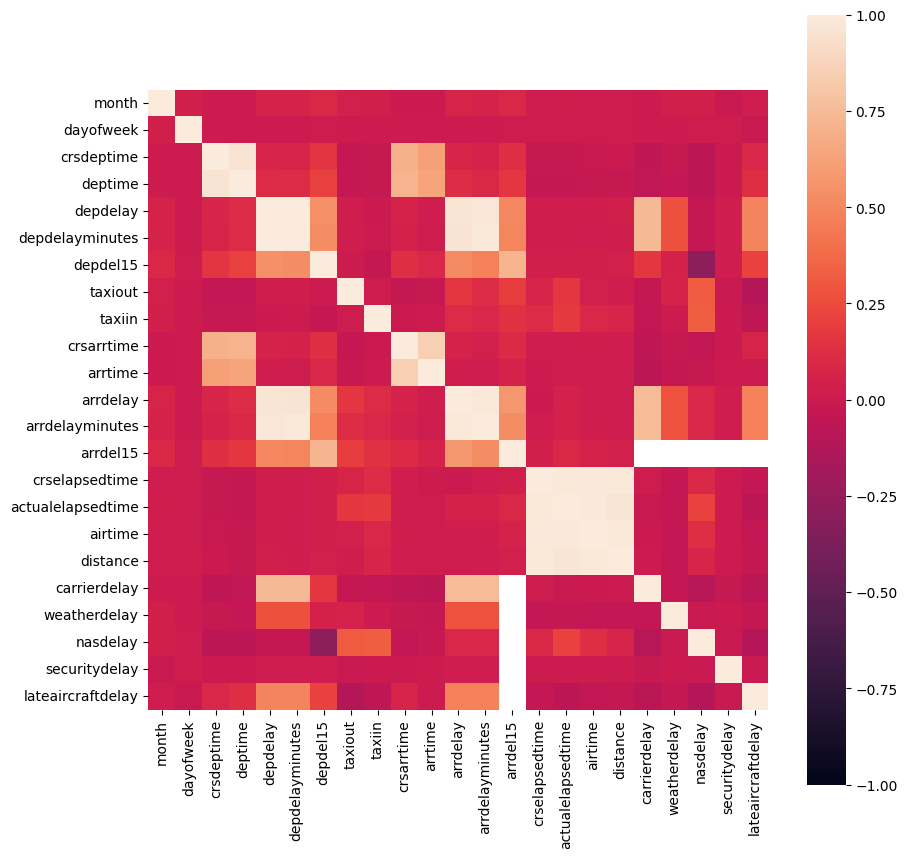

In [22]:
#correlation matrix - Plotting correlation to find multi-collinearity between variables
numeric_flight_data = flight_data_v3.select_dtypes(include=['number'])
correlation_matrix = numeric_flight_data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, square=True);
plt.savefig('../graphs/analysis_20.png', bbox_inches='tight')
plt.show()

In [23]:
flight_data_v3

,month,dayofweek,flightdate,reporting_airline,origin,originstatename,dest,deststatename,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,taxiout,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,crselapsedtime,actualelapsedtime,airtime,distance,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,12,3,2021-12-08,OH,EWN,North Carolina,CLT,North Carolina,1814,1811.0,-3.0,0.0,0.0,12.0,14.0,1939,1931.0,-8.0,0.0,0.0,85.0,80.0,54.0,221.0,NaN,NaN,NaN,NaN,NaN
1,12,4,2021-12-09,OH,EWN,North Carolina,CLT,North Carolina,1814,1803.0,-11.0,0.0,0.0,21.0,6.0,1939,1934.0,-5.0,0.0,0.0,85.0,91.0,64.0,221.0,NaN,NaN,NaN,NaN,NaN
2,12,5,2021-12-10,OH,EWN,North Carolina,CLT,North Carolina,1814,1812.0,-2.0,0.0,0.0,27.0,6.0,1939,1939.0,0.0,0.0,0.0,85.0,87.0,54.0,221.0,NaN,NaN,NaN,NaN,NaN
3,12,6,2021-12-11,OH,EWN,North Carolina,CLT,North Carolina,1814,1846.0,32.0,32.0,1.0,16.0,7.0,1939,2004.0,25.0,25.0,1.0,85.0,78.0,55.0,221.0,0.0,0.0,0.0,0.0,25.0
4,12,7,2021-12-12,OH,EWN,North Carolina,CLT,North Carolina,1814,1808.0,-6.0,0.0,0.0,15.0,7.0,1939,1919.0,-20.0,0.0,0.0,85.0,71.0,49.0,221.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099438,11,6,2021-11-13,UA,DEN,Colorado,OGG,Hawaii,1350,1401.0,11.0,11.0,0.0,13.0,5.0,1821,1829.0,8.0,8.0,0.0,451.0,448.0,430.0,3302.0,NaN,NaN,NaN,NaN,NaN
1099439,11,6,2021-11-13,UA,ORD,Illinois,DCA,Virginia,2105,2054.0,-11.0,0.0,0.0,12.0,11.0,2349,2334.0,-15.0,0.0,0.0,104.0,100.0,77.0,612.0,NaN,NaN,NaN,NaN,NaN
1099440,11,6,2021-11-13,UA,IAH,Texas,SNA,California,1820,1822.0,2.0,2.0,0.0,20.0,5.0,2002,1944.0,-18.0,0.0,0.0,222.0,202.0,177.0,1346.0,NaN,NaN,NaN,NaN,NaN
1099442,11,6,2021-11-13,UA,MEM,Tennessee,IAH,Texas,700,653.0,-7.0,0.0,0.0,15.0,4.0,847,823.0,-24.0,0.0,0.0,107.0,90.0,71.0,468.0,NaN,NaN,NaN,NaN,NaN


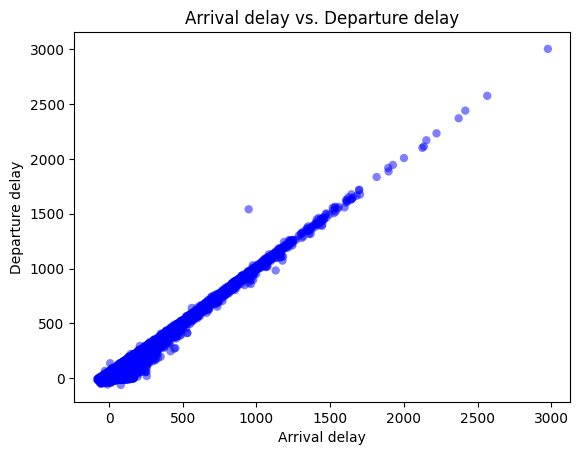

In [24]:
# Checking linearity between arrival delay and departure delay
# Plotting a bi-plot
fig, ax = plt.subplots()
ax.grid(False)
x = flight_data_v3['arrdelay']
y = flight_data_v3['depdelay']
plt.scatter(x,y,c='blue', edgecolors='none',alpha=0.5)
plt.xlabel('Arrival delay')
plt.ylabel('Departure delay')
plt.title('Arrival delay vs. Departure delay')
plt.savefig('../graphs/analysis_2.png', bbox_inches='tight')
plt.show()

In [25]:
# Clearly there is a linear relationship as expected. 

In [26]:
# Creating a new column called total delay. Total delays is the sum of arrival delays and departure delays only!
flight_data_v3.loc[:,'totaldelay'] = flight_data_v3.loc[:,'arrdelayminutes'] + flight_data_v3.loc[:,'depdelayminutes']
flight_data_v3.loc[:,'totaldelay15'] = flight_data_v3.loc[:,'totaldelay']//15

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\1613499800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data_v3.loc[:,'totaldelay'] = flight_data_v3.loc[:,'arrdelayminutes'] + flight_data_v3.loc[:,'depdelayminutes']
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\1613499800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data_v3.loc[:,'totaldelay15'] = flight_data_v3.loc[:,'totaldelay']//15


In [27]:
flight_data_v3.loc[:,'totaldelay15'] = flight_data_v3.loc[:,'totaldelay15'].astype(int)
flight_data_v3.loc[:,'totaldelay15'].head(7)

0    0.0
1    0.0
2    0.0
3    3.0
4    0.0
5    0.0
6    0.0
Name: totaldelay15, dtype: float64

In [28]:
# Apply lamda function to see if delay exists
flight_data_v3.loc[:,'totaldelay15'] = flight_data_v3.loc[:,'totaldelay15'].apply(lambda x:1 if x>0 else 0)

In [29]:
flight_data_v3.loc[:,'totaldelay15'].head(7)

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    0.0
Name: totaldelay15, dtype: float64

In [30]:
# flight_data_v3['totaldelay15'].value_counts()

In [31]:
# Cerating dataframe to plot delays and its percentages
delay_plot = pd.DataFrame()
delay_plot['status'] = flight_data_v3['totaldelay'] > 0
delay_plot['status_15'] = flight_data_v3['totaldelay15'] > 0

In [32]:
delay_data = {'Total No. Of Flights':[delay_plot['status'].count()], 
               'Number of flights delayed':[delay_plot['status'].value_counts()[True]],
               'Percentage 1':[( delay_plot['status'].value_counts()[True] *100 ) // delay_plot['status'].count()], 
               'Number of flights delayed for more than 15 minutes':[delay_plot['status_15'].value_counts()[True]],
               'Percentage 2':[( delay_plot['status_15'].value_counts()[True] * 100 ) // delay_plot['status'].count()]}
delay_info_table = pd.DataFrame(delay_data)
delay_info_table

,Total No. Of Flights,Number of flights delayed,Percentage 1,Number of flights delayed for more than 15 minutes,Percentage 2
0,1080584,508966,47,279813,25


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\2624708206.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax[0].text(0.050, 30, str(100 - int(delay_info_table['Percentage 1'])) + ' %', ha='center', va='bottom', fontsize=25)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\2624708206.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax[0].text(0.995, 15, str(int(delay_info_table['Percentage 1'])) + ' %', ha='center', va='bottom', fontsize=25)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\2624708206.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax[1].text(0.050, 35, str(100 - int(delay_info_table['Percentage 2'])) + ' %', ha='center', va='bottom', fontsize=25)
C:\Users\LENOVO\AppData\L

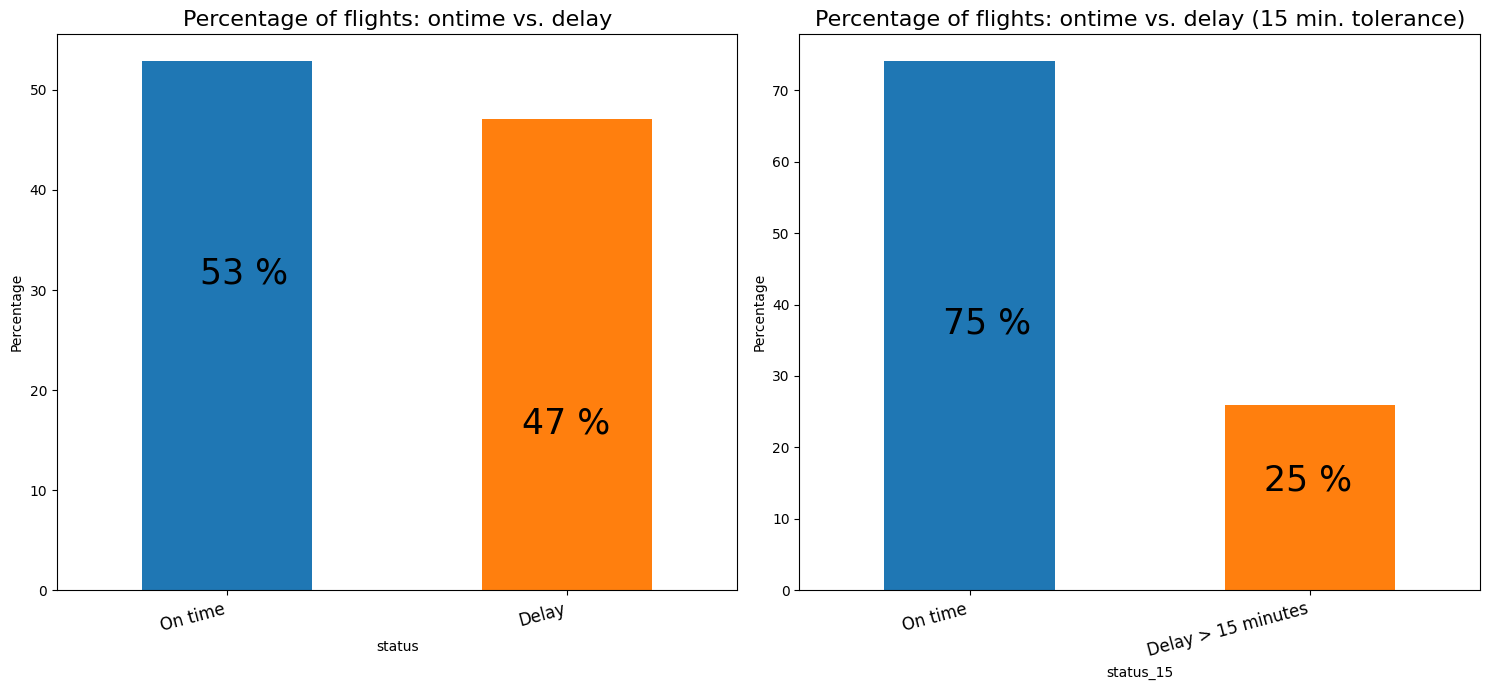

In [33]:
# Flights delayed for more than 15 minutes
# combined plot
f, ax = plt.subplots(1, 2, figsize=(15, 7))

palette = ['C0', 'C1']  # Set color

# Plotting percentage
(delay_plot['status'].value_counts(normalize=True)*100).plot(kind='bar', ax=ax[0], color=palette) 
(delay_plot['status_15'].value_counts(normalize=True)*100).plot(kind='bar', ax=ax[1], color=palette)  

# Set labels for the first subplot
ax[0].set_title("Percentage of flights: ontime vs. delay", fontsize=16)  # Title ax0
ax[0].set_xticklabels(['On time', 'Delay'], rotation=15, ha='right', fontsize=12)  # Rotate ax0
ax[0].text(0.050, 30, str(100 - int(delay_info_table['Percentage 1'])) + ' %', ha='center', va='bottom', fontsize=25)
ax[0].text(0.995, 15, str(int(delay_info_table['Percentage 1'])) + ' %', ha='center', va='bottom', fontsize=25)
ax[0].set(ylabel="Percentage")


# Set labels for the second subplot
ax[1].set_title("Percentage of flights: ontime vs. delay (15 min. tolerance)", fontsize=16)  # Title ax1
ax[1].set_xticklabels(['On time', 'Delay > 15 minutes'], rotation=15, ha='right', fontsize=12)  # Rotate ax1
ax[1].text(0.050, 35, str(100 - int(delay_info_table['Percentage 2'])) + ' %', ha='center', va='bottom', fontsize=25)
ax[1].text(0.995, 13, str(int(delay_info_table['Percentage 2'])) + ' %', ha='center', va='bottom', fontsize=25)
ax[1].set(ylabel="Percentage")

plt.tight_layout()  # Tight layout
plt.style.use('seaborn-colorblind')
plt.savefig('../graphs/analysis_3.png', bbox_inches='tight')
plt.show()  # Plot

# Flight delayed for less than 15 minutes

In [34]:
delay_plot['status'].head(8)

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7     True
Name: status, dtype: bool

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\6076374.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) #yticks in percentage


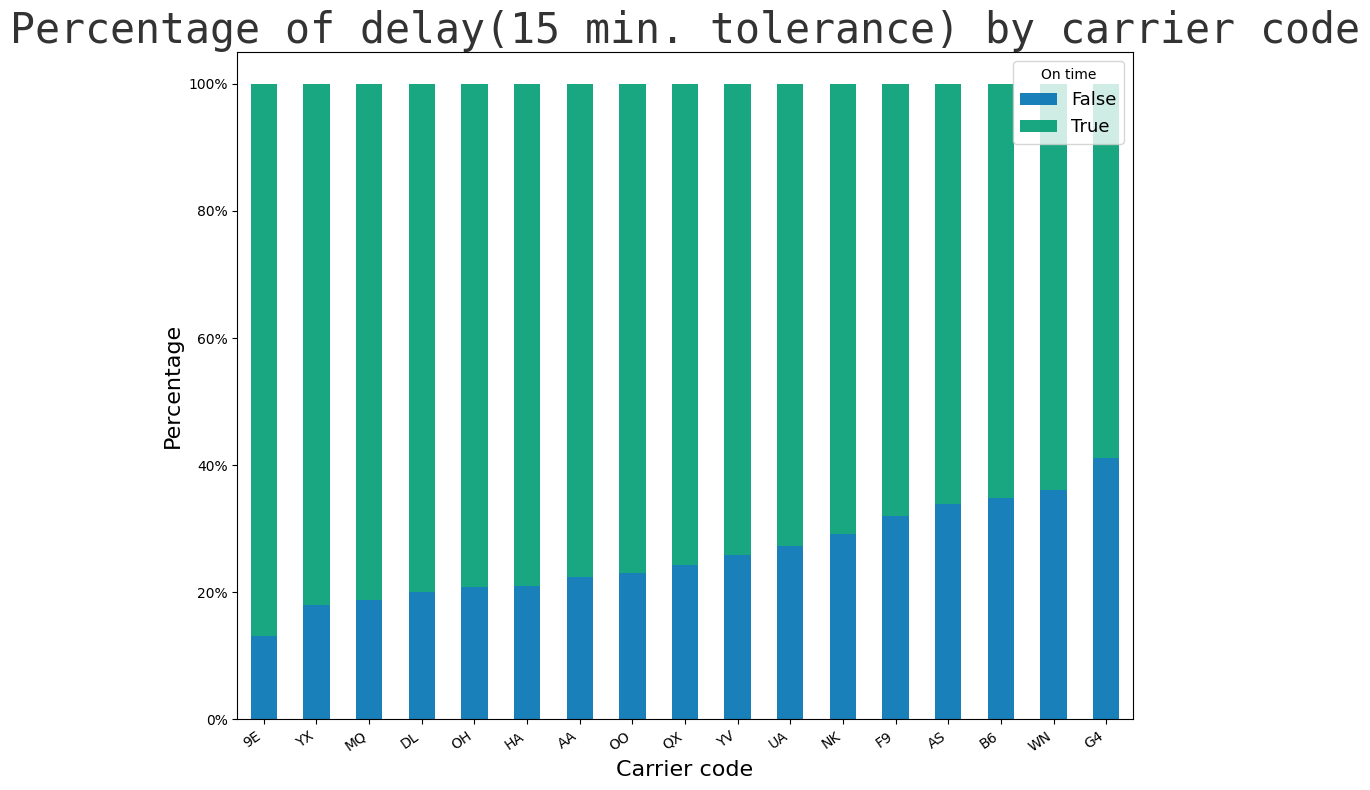

In [35]:
# Analysis of delay by carriers

#plot of delay for each carrier (stacked barchart)

#data preparation for plot
carier_delay_plot = pd.DataFrame() #empty df
carier_delay_plot['Carrier_code']=flight_data_v3['reporting_airline'] 
carier_delay_plot['ontime']=flight_data_v3['totaldelay15']<=0 
carier_delay_plot = carier_delay_plot.groupby(['Carrier_code','ontime']).size().unstack(1) #shape and class data
carier_delay_plot = carier_delay_plot.div(carier_delay_plot.sum(axis=1), axis=0) #percentage


#plot
f, ax = plt.subplots(figsize=(10, 8))
#stacked bar plot
carier_delay_plot.sort_values(by=False).plot(kind="bar", alpha=.9, stacked=True, ax=ax,color = palette) 
#set labels
ax.set_title("Percentage of delay(15 min. tolerance) by carrier code",fontsize = 30, fontname="Monospace", alpha=.8) #title
plt.xlabel('Carrier code', fontsize = 16) #xlabel
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
plt.ylabel("Percentage", fontsize = 16) #ylabel
ax.legend(loc='upper right', title='On time', fontsize = 13)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) #yticks in percentage
plt.tight_layout(rect=[0, 0, 1, 1]) #tight rectangular layout
# plt.savefig('../graphs/EDA_plot3.png', bbox_inches='tight') #save img
plt.savefig('../graphs/analysis_4.png', bbox_inches='tight')
plt.show() #plot


In [36]:
flight_data_v3['dayofweek'].unique()

array([3, 4, 5, 6, 7, 1, 2], dtype=int64)

In [37]:
#Function to return weekday name from number1-7
def number_to_day(number):
    # Adjust for the 1-based indexing by subtracting 1
    return calendar.day_name[number - 1]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\3438824109.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) #yticks in percentage


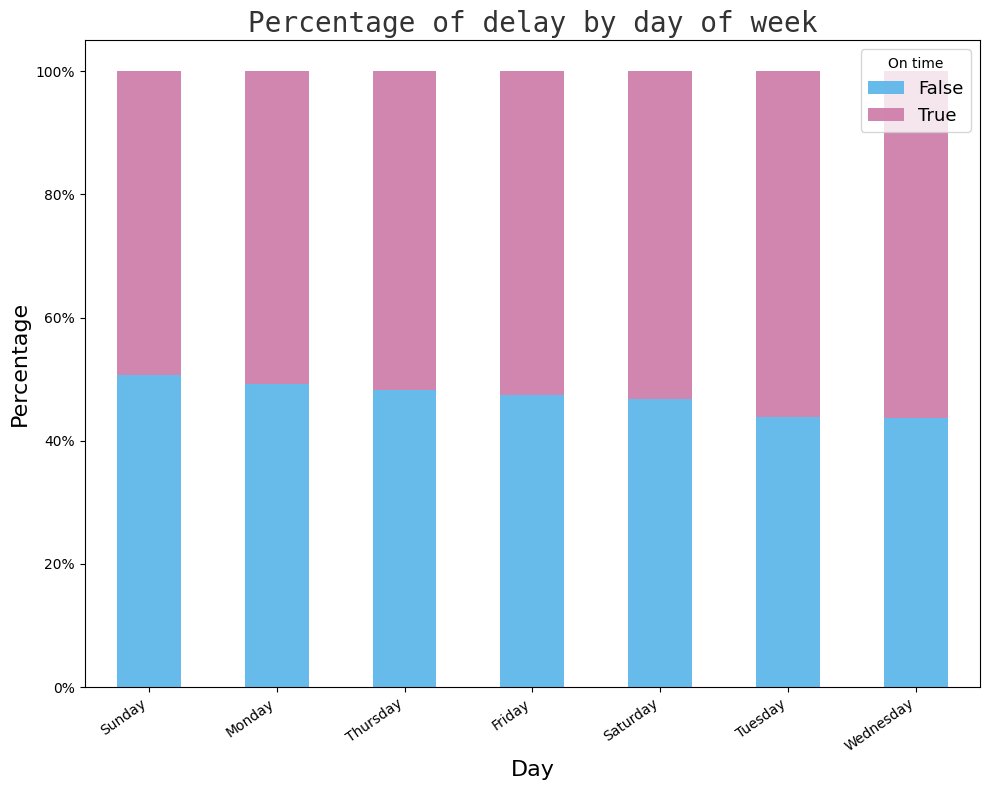

In [38]:
# Analysisi of delay of day of week

palette = ['C5','C3']
#data prep for plot
day_of_week_delay_plot = pd.DataFrame() #empty df
day_of_week_delay_plot['day']=flight_data_v3['dayofweek']
day_of_week_delay_plot['ontime']=flight_data_v3['totaldelay']<=0 
day_of_week_delay_plot = day_of_week_delay_plot.sort_values(by='day')
day_of_week_delay_plot['day'] = day_of_week_delay_plot['day'].apply(number_to_day)
day_of_week_delay_plot = day_of_week_delay_plot.groupby(['day','ontime']).size().unstack(1) #shape and class data
day_of_week_delay_plot = day_of_week_delay_plot.div(day_of_week_delay_plot.sum(axis=1), axis=0) #percentage

#plot
f, ax = plt.subplots(figsize=(10, 8))
day_of_week_delay_plot.sort_values(by=True).plot(kind="bar", alpha=.9, stacked=True, ax=ax,color = palette) #stacked bar plot
#set labels
ax.set_title("Percentage of delay by day of week",fontsize = 20, fontname="Monospace", alpha=.8) #title
plt.xlabel('Day', fontsize = 16) #xlabel
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
plt.ylabel("Percentage", fontsize = 16) #ylabel
ax.legend(loc='upper right', title='On time', fontsize = 13)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) #yticks in percentage
plt.tight_layout(rect=[0, 0, 1, 1]) #tight rectangular layout
# plt.savefig('../graphs/EDA_plot3.png', bbox_inches='tight') #save img
plt.savefig('../graphs/analysis_5.png', bbox_inches='tight')
plt.show() #plot




In [39]:
flight_data_v3.keys()

Index(['month', 'dayofweek', 'flightdate', 'reporting_airline', 'origin',
       'originstatename', 'dest', 'deststatename', 'crsdeptime', 'deptime',
       'depdelay', 'depdelayminutes', 'depdel15', 'taxiout', 'taxiin',
       'crsarrtime', 'arrtime', 'arrdelay', 'arrdelayminutes', 'arrdel15',
       'crselapsedtime', 'actualelapsedtime', 'airtime', 'distance',
       'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay',
       'lateaircraftdelay', 'totaldelay', 'totaldelay15'],
      dtype='object')

In [40]:
flight_data_v3['flightdate'].unique()

array(['2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
       '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
       '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
       '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
       '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
       '2021-12-29', '2021-12-30', '2021-12-01', '2021-12-02',
       '2021-12-03', '2021-12-05', '2021-12-04', '2021-12-06',
       '2021-12-07', '2021-12-24', '2021-12-31', '2021-11-22',
       '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
       '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-16',
       '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
       '2021-11-21', '2021-11-30', '2021-11-14', '2021-11-02',
       '2021-11-12', '2021-11-13', '2021-11-08', '2021-11-04',
       '2021-11-10', '2021-11-01', '2021-11-03', '2021-11-11',
       '2021-11-09', '2021-11-15', '2021-11-05', '2021-11-06',
       '2021-11-07'], dtype=object)

   dayofweek  totaldelay
0          1   28.840803
1          2   23.389360
2          3   22.961909
3          4   26.197291
4          5   24.000962
5          6   26.257482
6          7   29.382019


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\1961953258.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


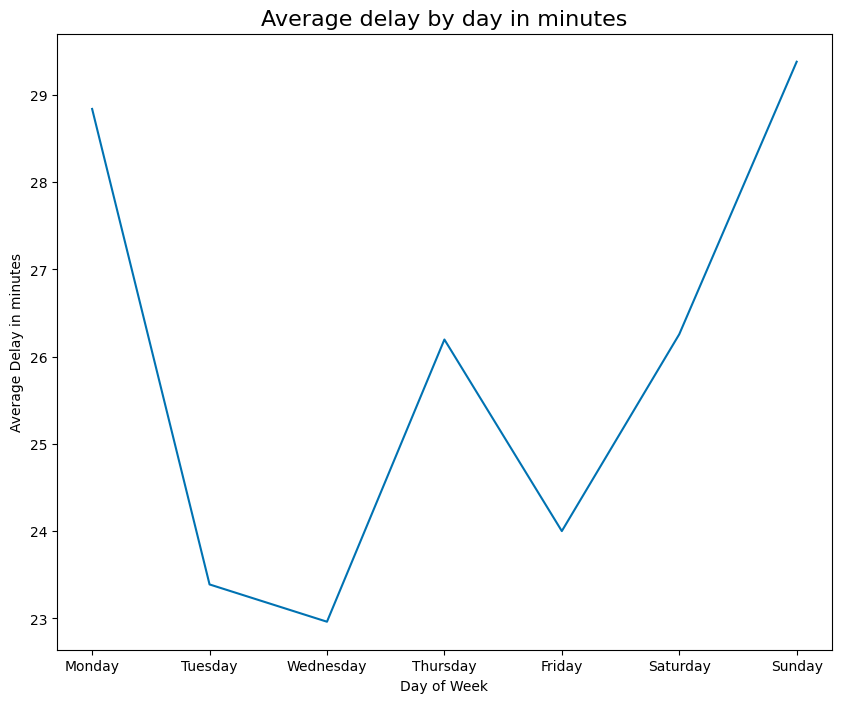

In [41]:

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Group by 'dayofweek' and calculate the mean of 'totaldelay'

delay_by_day_df = flight_data_v3[['dayofweek', 'totaldelay']].groupby(['dayofweek']).mean().reset_index()
print(delay_by_day_df)
plt.plot(delay_by_day_df['dayofweek'],delay_by_day_df['totaldelay'])
# Set title and labels
ax.set_title('Average delay by day in minutes', fontsize=16)
ax.set_xticklabels(['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Delay in minutes')
plt.savefig('../graphs/analysis_6.png', bbox_inches='tight')
plt.show()

In [42]:
delay_by_day_df

,dayofweek,totaldelay
0,1,28.840803
1,2,23.389360
2,3,22.961909
3,4,26.197291
4,5,24.000962
5,6,26.257482
6,7,29.382019


In [43]:
delay_plot.shape

(1080584, 2)

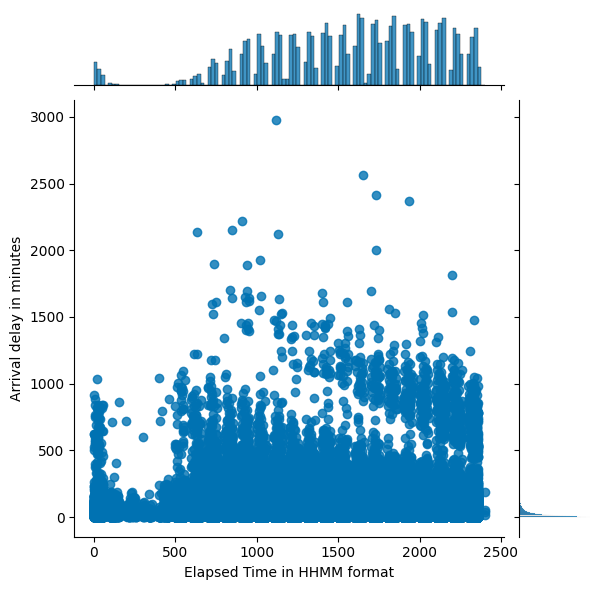

In [44]:
# Joint grid plot containing scatter plot and histogram
crs_delay__tmp_df = flight_data_v3[flight_data_v3['arrdelay']>0]
crs_delay_df = crs_delay__tmp_df[['crsarrtime','arrdelay']]
g = sns.JointGrid(x='crsarrtime',y='arrdelay',data=crs_delay_df)
g.plot(sns.regplot, sns.histplot)
# plt.xticks(old_x_tikcs, time_labels)
# Set axis labels
g.set_axis_labels('Elapsed Time in HHMM format', 'Arrival delay in minutes')
plt.savefig('../graphs/analysis_7.png', bbox_inches='tight')
plt.savefig('../graphs/analysis_7.png', bbox_inches='tight')
plt.show()

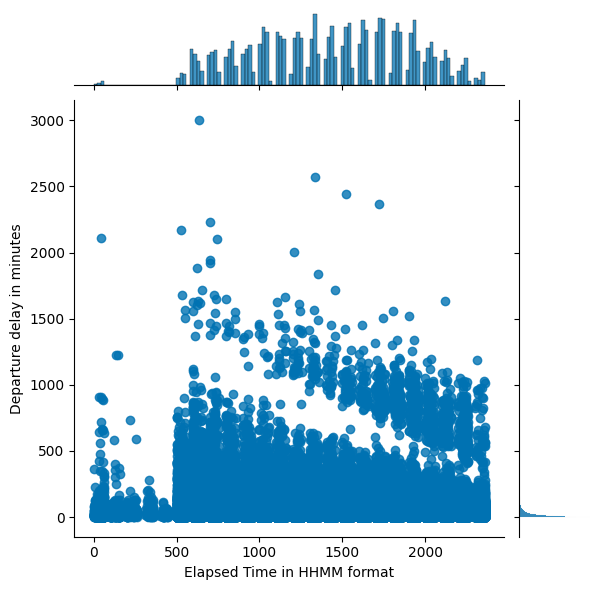

In [45]:
crs_delay__tmp_df = flight_data_v3[flight_data_v3['depdelay']>0]
crs_delay_df = crs_delay__tmp_df[['crsdeptime','depdelay']]

g = sns.JointGrid(x='crsdeptime',y='depdelay',data=crs_delay_df)
g.plot(sns.regplot, sns.histplot)
# plt.xticks(old_x_tikcs, time_labels)
# Set axis labels
g.set_axis_labels('Elapsed Time in HHMM format', 'Departure delay in minutes')
plt.savefig('../graphs/analysis_27.png', bbox_inches='tight')
plt.show()

In [46]:
# Checking sanity of origin with originAriportID and destination with destairportID
# This has to be done because there are chance airport id to be reused or changed in the future
origin_sanity_check = flight_data_v2.groupby('originairportid').apply(lambda dfg: list(dfg[['origin']].to_dict(orient='list').values())[0]).to_dict()
for key in origin_sanity_check.keys():
    origin_sanity_check[key] = list(set(origin_sanity_check[key]))[0]

In [47]:
# Clearly originairportIDcode is linked with single and unique origin code. Using origin code for further analysis
origin_sanity_check

{10135: 'ABE',
 10136: 'ABI',
 10140: 'ABQ',
 10141: 'ABR',
 10146: 'ABY',
 10155: 'ACT',
 10157: 'ACV',
 10158: 'ACY',
 10165: 'ADK',
 10170: 'ADQ',
 10185: 'AEX',
 10208: 'AGS',
 10245: 'AKN',
 10257: 'ALB',
 10268: 'ALO',
 10272: 'ALS',
 10275: 'ALW',
 10279: 'AMA',
 10299: 'ANC',
 10333: 'APN',
 10372: 'ASE',
 10397: 'ATL',
 10408: 'ATW',
 10409: 'ATY',
 10423: 'AUS',
 10431: 'AVL',
 10434: 'AVP',
 10466: 'AZA',
 10469: 'AZO',
 10529: 'BDL',
 10551: 'BET',
 10558: 'BFF',
 10561: 'BFL',
 10577: 'BGM',
 10581: 'BGR',
 10599: 'BHM',
 10617: 'BIH',
 10620: 'BIL',
 10627: 'BIS',
 10631: 'BJI',
 10666: 'BLI',
 10676: 'BLV',
 10685: 'BMI',
 10693: 'BNA',
 10713: 'BOI',
 10721: 'BOS',
 10728: 'BPT',
 10731: 'BQK',
 10732: 'BQN',
 10739: 'BRD',
 10747: 'BRO',
 10754: 'BRW',
 10779: 'BTM',
 10781: 'BTR',
 10785: 'BTV',
 10792: 'BUF',
 10800: 'BUR',
 10821: 'BWI',
 10849: 'BZN',
 10868: 'CAE',
 10874: 'CAK',
 10918: 'CDC',
 10926: 'CDV',
 10967: 'CGI',
 10980: 'CHA',
 10990: 'CHO',
 10994: 'C

In [48]:
# Checking sanity of destination with originAriportID and destination with destairportID
# This has to be done because there are chance airport id to be reused or changed in the future
dest_sanity_check = flight_data_v2.groupby('destairportid').apply(lambda dfg: list(dfg[['dest']].to_dict(orient='list').values())[0]).to_dict()
for key in dest_sanity_check.keys():
    dest_sanity_check[key] = list(set(dest_sanity_check[key]))[0]

In [49]:
# Clearly destairportIDcode is linked with single and unique destination code. Using dest code for further analysis
origin_sanity_check

{10135: 'ABE',
 10136: 'ABI',
 10140: 'ABQ',
 10141: 'ABR',
 10146: 'ABY',
 10155: 'ACT',
 10157: 'ACV',
 10158: 'ACY',
 10165: 'ADK',
 10170: 'ADQ',
 10185: 'AEX',
 10208: 'AGS',
 10245: 'AKN',
 10257: 'ALB',
 10268: 'ALO',
 10272: 'ALS',
 10275: 'ALW',
 10279: 'AMA',
 10299: 'ANC',
 10333: 'APN',
 10372: 'ASE',
 10397: 'ATL',
 10408: 'ATW',
 10409: 'ATY',
 10423: 'AUS',
 10431: 'AVL',
 10434: 'AVP',
 10466: 'AZA',
 10469: 'AZO',
 10529: 'BDL',
 10551: 'BET',
 10558: 'BFF',
 10561: 'BFL',
 10577: 'BGM',
 10581: 'BGR',
 10599: 'BHM',
 10617: 'BIH',
 10620: 'BIL',
 10627: 'BIS',
 10631: 'BJI',
 10666: 'BLI',
 10676: 'BLV',
 10685: 'BMI',
 10693: 'BNA',
 10713: 'BOI',
 10721: 'BOS',
 10728: 'BPT',
 10731: 'BQK',
 10732: 'BQN',
 10739: 'BRD',
 10747: 'BRO',
 10754: 'BRW',
 10779: 'BTM',
 10781: 'BTR',
 10785: 'BTV',
 10792: 'BUF',
 10800: 'BUR',
 10821: 'BWI',
 10849: 'BZN',
 10868: 'CAE',
 10874: 'CAK',
 10918: 'CDC',
 10926: 'CDV',
 10967: 'CGI',
 10980: 'CHA',
 10990: 'CHO',
 10994: 'C

In [50]:
# Trying to figure out the route that has the maximum delay
route_delay_df = flight_data_v3
route_delay_df.loc[:,'Route'] = flight_data_v3.loc[:,'origin'] + ' - ' + flight_data_v3.loc[:,'dest']
route_delay_df.head(10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\3678078656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_delay_df.loc[:,'Route'] = flight_data_v3.loc[:,'origin'] + ' - ' + flight_data_v3.loc[:,'dest']


,month,dayofweek,flightdate,reporting_airline,origin,originstatename,dest,deststatename,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,taxiout,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,crselapsedtime,actualelapsedtime,airtime,distance,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,totaldelay,totaldelay15,Route
0,12,3,2021-12-08,OH,EWN,North Carolina,CLT,North Carolina,1814,1811.0,-3.0,0.0,0.0,12.0,14.0,1939,1931.0,-8.0,0.0,0.0,85.0,80.0,54.0,221.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,EWN - CLT
1,12,4,2021-12-09,OH,EWN,North Carolina,CLT,North Carolina,1814,1803.0,-11.0,0.0,0.0,21.0,6.0,1939,1934.0,-5.0,0.0,0.0,85.0,91.0,64.0,221.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,EWN - CLT
2,12,5,2021-12-10,OH,EWN,North Carolina,CLT,North Carolina,1814,1812.0,-2.0,0.0,0.0,27.0,6.0,1939,1939.0,0.0,0.0,0.0,85.0,87.0,54.0,221.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,EWN - CLT
3,12,6,2021-12-11,OH,EWN,North Carolina,CLT,North Carolina,1814,1846.0,32.0,32.0,1.0,16.0,7.0,1939,2004.0,25.0,25.0,1.0,85.0,78.0,55.0,221.0,0.0,0.0,0.0,0.0,25.0,57.0,1.0,EWN - CLT
4,12,7,2021-12-12,OH,EWN,North Carolina,CLT,North Carolina,1814,1808.0,-6.0,0.0,0.0,15.0,7.0,1939,1919.0,-20.0,0.0,0.0,85.0,71.0,49.0,221.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,EWN - CLT
5,12,1,2021-12-13,OH,EWN,North Carolina,CLT,North Carolina,1814,1808.0,-6.0,0.0,0.0,20.0,10.0,1939,1930.0,-9.0,0.0,0.0,85.0,82.0,52.0,221.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,EWN - CLT
6,12,2,2021-12-14,OH,EWN,North Carolina,CLT,North Carolina,1814,1804.0,-10.0,0.0,0.0,21.0,4.0,1939,1920.0,-19.0,0.0,0.0,85.0,76.0,51.0,221.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,EWN - CLT
7,12,3,2021-12-15,OH,EWN,North Carolina,CLT,North Carolina,1814,1822.0,8.0,8.0,0.0,18.0,11.0,1939,1937.0,-2.0,0.0,0.0,85.0,75.0,46.0,221.0,NaN,NaN,NaN,NaN,NaN,8.0,0.0,EWN - CLT
8,12,4,2021-12-16,OH,EWN,North Carolina,CLT,North Carolina,1819,1839.0,20.0,20.0,1.0,10.0,6.0,1939,1945.0,6.0,6.0,0.0,80.0,66.0,50.0,221.0,NaN,NaN,NaN,NaN,NaN,26.0,1.0,EWN - CLT
9,12,5,2021-12-17,OH,EWN,North Carolina,CLT,North Carolina,1819,1810.0,-9.0,0.0,0.0,22.0,13.0,1939,1938.0,-1.0,0.0,0.0,80.0,88.0,53.0,221.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,EWN - CLT


In [51]:
flight_data_v3.keys()

Index(['month', 'dayofweek', 'flightdate', 'reporting_airline', 'origin',
       'originstatename', 'dest', 'deststatename', 'crsdeptime', 'deptime',
       'depdelay', 'depdelayminutes', 'depdel15', 'taxiout', 'taxiin',
       'crsarrtime', 'arrtime', 'arrdelay', 'arrdelayminutes', 'arrdel15',
       'crselapsedtime', 'actualelapsedtime', 'airtime', 'distance',
       'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay',
       'lateaircraftdelay', 'totaldelay', 'totaldelay15', 'Route'],
      dtype='object')

In [52]:
# Is there actually any benefit when the flight departs early?
# Getting count of flight departing early
early_dep_df = flight_data_v3[flight_data_v3['depdelay']<0]
# sns.pairplot(flight_data_v3[['depdelay','arrdelay','totaldelay']], height = 2.5)
# plt.show()


No of flights starting early 608502
No of flights reaching late inspite of starting early 82526
Weather related delays 20
Percentage  13
Percentage of flights reaching 15 minutes late inspite of starting  2


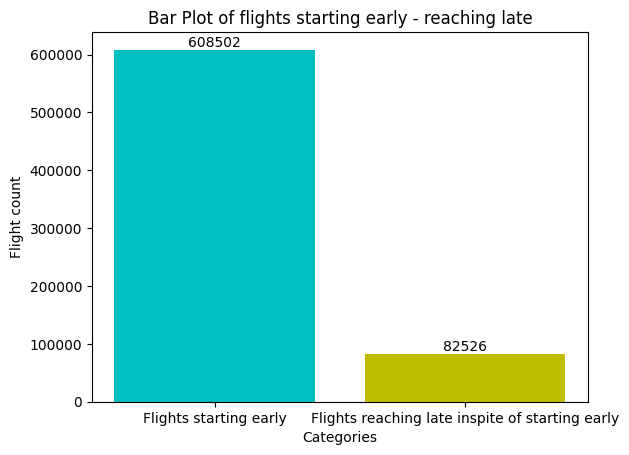

In [53]:
# Getting count of flight departing early and arriving late
flights_starting_early = early_dep_df['depdelay'].count()
# Removing weather disrupted flights
flights_starting_early_reaching_late = early_dep_df[early_dep_df['arrdelay']>0]['arrdelay'].count()
weather_related_delay_count = early_dep_df[early_dep_df['weatherdelay']>0]['weatherdelay'].count()
# Percentage
percentage_of_delay = ((early_dep_df[early_dep_df['arrdelay']>0]['arrdelay'].count() - weather_related_delay_count) * 100)//early_dep_df['depdelay'].count()
percentage_of_delay_15 = ((early_dep_df[early_dep_df['arrdel15']>0]['arrdel15'].count() - weather_related_delay_count) * 100)//early_dep_df['depdelay'].count()

arriving_late_df = early_dep_df[early_dep_df['arrdelay']>0]

print('No of flights starting early', flights_starting_early)
print('No of flights reaching late inspite of starting early', flights_starting_early_reaching_late)
print('Weather related delays', weather_related_delay_count)
print('Percentage ', percentage_of_delay)
print('Percentage of flights reaching 15 minutes late inspite of starting ', percentage_of_delay_15)


early_dep_delay_data = {'No of flights starting early':[flights_starting_early], 
               'No of flights delayed inspite of starting early':[flights_starting_early_reaching_late],
               'Weather related delays':[weather_related_delay_count], 
               'Percentage ':[str(percentage_of_delay) + ' %'],
               'Percentage of flights reaching 15 minutes late':[str(percentage_of_delay_15) + ' %']}
early_dep_delay_table = pd.DataFrame(early_dep_delay_data)
early_dep_delay_table

# Create the categories and values
categories = ['Flights starting early', 'Flights reaching late inspite of starting early']
values = [flights_starting_early, flights_starting_early_reaching_late] 

# Create the bar plot for the above data
plt.bar(categories, values, color=['c','y'])

# Add labels and a title
plt.xlabel('Categories')
plt.ylabel('Flight count')
plt.title('Bar Plot of flights starting early - reaching late')

for i, value in enumerate(values):
    plt.annotate(str(value), (categories[i], value), ha='center', va='bottom')
plt.savefig('../graphs/analysis_25.png', bbox_inches='tight')
# Show the plot
plt.show()


In [54]:
arriving_late_df.shape

(82526, 32)

In [55]:
arriving_late_by_15_df = early_dep_df[early_dep_df['arrdel15']>0]

In [56]:
arriving_late_by_15_df.shape

(18217, 32)

In [57]:
# Is speed the reason?
# Calculating average speed: Distance / Airtime
arriving_late_by_15_df.loc[:,'averagespeed'] = (arriving_late_by_15_df.loc[:,'distance']*60)//arriving_late_by_15_df.loc[:,'airtime']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\1610771838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arriving_late_by_15_df.loc[:,'averagespeed'] = (arriving_late_by_15_df.loc[:,'distance']*60)//arriving_late_by_15_df.loc[:,'airtime']


In [58]:
# Lets check the average speed of domestic aircrafts in the US
flight_data_v3.loc[:,'averagespeed'] = (flight_data_v3.loc[:,'distance']*60)//flight_data_v3.loc[:,'airtime']
pd.set_option('display.float_format', None)
print(flight_data_v3['averagespeed'].describe())

count    1.080584e+06
mean     4.064165e+02
std      7.296825e+01
min      3.600000e+01
25%      3.620000e+02
50%      4.110000e+02
75%      4.550000e+02
max      7.930000e+02
Name: averagespeed, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\3332287621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data_v3.loc[:,'averagespeed'] = (flight_data_v3.loc[:,'distance']*60)//flight_data_v3.loc[:,'airtime']


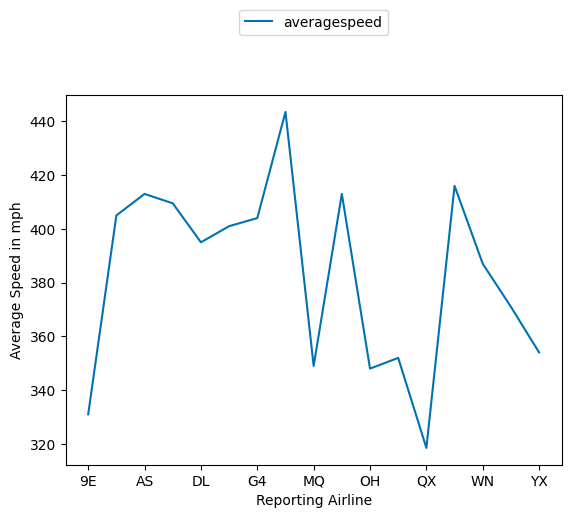

In [59]:
# Grouping and averaging speed by carrier code
arriving_late_df_v1 = arriving_late_by_15_df.groupby('reporting_airline')['averagespeed'].median().plot()
# Adding labels
plt.xlabel('Reporting Airline')
plt.ylabel('Average Speed in mph')
arriving_late_df_v1.legend(loc='upper center',bbox_to_anchor=(0.5, 1.25))
plt.savefig('../graphs/analysis_8.png', bbox_inches='tight')
plt.show()

In [60]:
# Checking what happened to these flights - what delays caused these phenomenons
arriving_late_df_qx = arriving_late_by_15_df[['reporting_airline','averagespeed','arrdelay','carrierdelay','weatherdelay','nasdelay','lateaircraftdelay','securitydelay']]
arriving_late_df_qx
# Okay it seems there are only 

,reporting_airline,averagespeed,arrdelay,carrierdelay,weatherdelay,nasdelay,lateaircraftdelay,securitydelay
41,OH,416.0,22.0,0.0,0.0,22.0,0.0,0.0
82,OH,289.0,16.0,0.0,0.0,16.0,0.0,0.0
165,OH,321.0,34.0,0.0,0.0,34.0,0.0,0.0
168,OH,393.0,31.0,0.0,0.0,31.0,0.0,0.0
199,OH,380.0,19.0,0.0,0.0,19.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1099264,UA,341.0,35.0,0.0,0.0,35.0,0.0,0.0
1099325,UA,562.0,21.0,0.0,0.0,21.0,0.0,0.0
1099359,UA,360.0,19.0,0.0,0.0,19.0,0.0,0.0
1099368,UA,321.0,48.0,0.0,0.0,48.0,0.0,0.0


In [61]:
# It seems NAS delay is the culprit here.....
# Verifying the same...
print(len(arriving_late_df_qx[arriving_late_df_qx['carrierdelay']!=0.0]))
print(len(arriving_late_df_qx[arriving_late_df_qx['weatherdelay']!=0.0]))
print(len(arriving_late_df_qx[arriving_late_df_qx['nasdelay']!=0.0]))
print(len(arriving_late_df_qx[arriving_late_df_qx['lateaircraftdelay']!=0.0]))
print(len(arriving_late_df_qx[arriving_late_df_qx['securitydelay']!=0.0]))

2541
20
15656
1
0


In [62]:
# So majority of the delays are due to NAS as suspected. However some of the delays are due to the carrier themselves.
# As carrier are directly responsible in improving these delay we can inspect them closely
delay_responsible_by_carriers = arriving_late_df_qx[arriving_late_df_qx['carrierdelay']!=0.0]
delay_responsible_by_carriers

,reporting_airline,averagespeed,arrdelay,carrierdelay,weatherdelay,nasdelay,lateaircraftdelay,securitydelay
10162,OO,333.0,55.0,55.0,0.0,0.0,0.0,0.0
10173,OO,361.0,15.0,15.0,0.0,0.0,0.0,0.0
10177,OO,390.0,24.0,24.0,0.0,0.0,0.0,0.0
10190,OO,406.0,51.0,51.0,0.0,0.0,0.0,0.0
10226,OO,472.0,37.0,37.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1051983,OO,223.0,16.0,16.0,0.0,0.0,0.0,0.0
1052082,OO,366.0,22.0,22.0,0.0,0.0,0.0,0.0
1052095,OO,345.0,17.0,17.0,0.0,0.0,0.0,0.0
1052108,OO,353.0,22.0,22.0,0.0,0.0,0.0,0.0


In [63]:
def find_key(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    # If the value is not found, you can handle it accordingly, for example, return None.
    return None

In [64]:
average_speed_df = arriving_late_df_qx[['reporting_airline','averagespeed']].groupby('reporting_airline').mean().reset_index()
average_speed_df

,reporting_airline,averagespeed
0,9E,329.959309
1,AA,402.267380
2,AS,417.659649
3,B6,409.297020
4,DL,397.798046
5,F9,400.568266
6,G4,404.942130
7,HA,414.287037
8,MQ,340.993873
9,NK,414.542042


In [65]:
round(average_speed_df[average_speed_df['reporting_airline']=='OO']['averagespeed'],2)

11    350.93
Name: averagespeed, dtype: float64

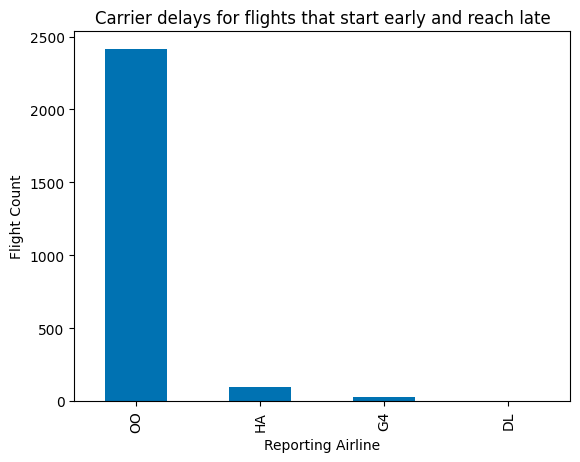

In [66]:
#Checking which all carriers are responsible
value_counts = delay_responsible_by_carriers['reporting_airline'].value_counts()
value_counts.plot(kind='bar')
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1,v, ha='center', va='bottom')
    
plt.xlabel('Reporting Airline')
plt.ylabel('Flight Count')
# delay_responsible_by_carriers.legend(loc='upper center',bbox_to_anchor=(0.5, 1.25))
plt.savefig('../graphs/analysis_39.png', bbox_inches='tight')
plt.title('Carrier delays for flights that start early and reach late')
plt.show()

In [67]:
# Box and whisket plot of carrier with most delays
# Finding top 5 airlines with most delays
airlineswith_most_delays = flight_data_v3[['reporting_airline','arrdelayminutes']].groupby('reporting_airline').sum()
airlineswith_most_delays = airlineswith_most_delays['arrdelayminutes'].sort_values(ascending=False)
airlineswith_most_delays[0:5]

reporting_airline
WN    2385330.0
OO    2094253.0
AA    1645528.0
DL    1448117.0
UA    1152116.0
Name: arrdelayminutes, dtype: float64

{'Arrival Delay for WN': array([ 1., 28., 26., ..., 46.,  7., 22.]), 'Carrier Delay for WN': array([nan,  0.,  0., ...,  2., nan,  0.]), 'NAS Delay for WN': array([nan, 28., 26., ..., 28., nan, 22.])}


Text(0.5, 1.0, 'Boxplot delays in WN flights')

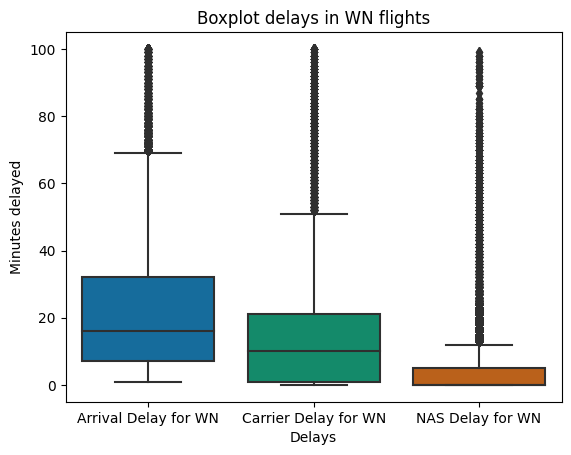

In [68]:
# Okay, now we have the top5 airline with maximum delays
# Lets try to create a box and whisker plot for each delay for these airlines since weather and security are independent features - Im skipping them
# So box and whisker for top5 airlines on arrival delay, carrier delay and NAS delay
bw_WN_df = flight_data_v3[flight_data_v3['arrdelayminutes']>0.0]
bw_WN_df = bw_WN_df[bw_WN_df['reporting_airline']=='WN']
bw_WN_df = bw_WN_df[bw_WN_df['arrdelayminutes']<=100]
bw_WN_data = {
    'Arrival Delay for WN':bw_WN_df[['arrdelayminutes']].values.ravel(),
    'Carrier Delay for WN':bw_WN_df[['carrierdelay']].values.ravel(),
    'NAS Delay for WN':bw_WN_df[['nasdelay']].values.ravel()
}
# bw_WN_df= bw_WN_df[['arrdelayminutes','carrierdelay','nasdelay']]
bw_WN_data
# Create a boxplot using Seaborn
print(bw_WN_data)
final_bw_WN_df = pd.DataFrame(bw_WN_data)
sns.boxplot(data=final_bw_WN_df)

# Add labels and title
plt.xlabel('Delays')
plt.ylabel('Minutes delayed')
plt.title('Boxplot delays in WN flights')

{'Arrival Delay for OO': array([45., 29., 38., ...,  7.,  2.,  9.]), 'Carrier Delay for OO': array([ 0.,  0., 38., ..., nan, nan, nan]), 'NAS Delay for OO': array([ 0.,  0.,  0., ..., nan, nan, nan])}


Text(0.5, 1.0, 'Boxplot delays in OO flights')

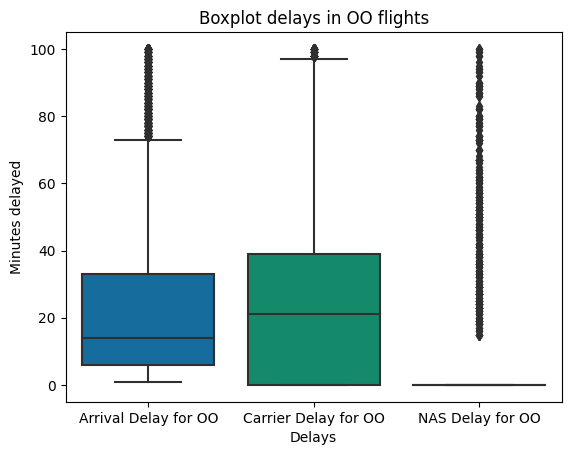

In [69]:
# Okay, now we have the top5 airline with maximum delays
# Lets try to create a box and whisker plot for each delay for these airlines since weather and security are independent features - Im skipping them
# So box and whisker for top5 airlines on arrival delay, carrier delay and NAS delay
bw_OO_df = flight_data_v3[flight_data_v3['arrdelayminutes']>0.0]
bw_OO_df = bw_OO_df[bw_OO_df['reporting_airline']=='OO']
bw_OO_df = bw_OO_df[bw_OO_df['arrdelayminutes']<=100]
bw_OO_data = {
    'Arrival Delay for OO':bw_OO_df[['arrdelayminutes']].values.ravel(),
    'Carrier Delay for OO':bw_OO_df[['carrierdelay']].values.ravel(),
    'NAS Delay for OO':bw_OO_df[['nasdelay']].values.ravel()
}
# bw_OO_df= bw_OO_df[['arrdelayminutes','carrierdelay','nasdelay']]
bw_OO_data
# Create a boxplot using Seaborn
print(bw_OO_data)
final_bw_OO_df = pd.DataFrame(bw_OO_data)
sns.boxplot(data=final_bw_OO_df)

# Add labels and title
plt.xlabel('Delays')
plt.ylabel('Minutes delayed')
plt.title('Boxplot delays in OO flights')

{'Arrival Delay for AA': array([12.,  8.,  2., ..., 57., 33.,  2.]), 'Carrier Delay for AA': array([nan, nan, nan, ..., 57.,  3., nan]), 'NAS Delay for AA': array([nan, nan, nan, ...,  0.,  0., nan])}


Text(0.5, 1.0, 'Boxplot delays in AA flights')

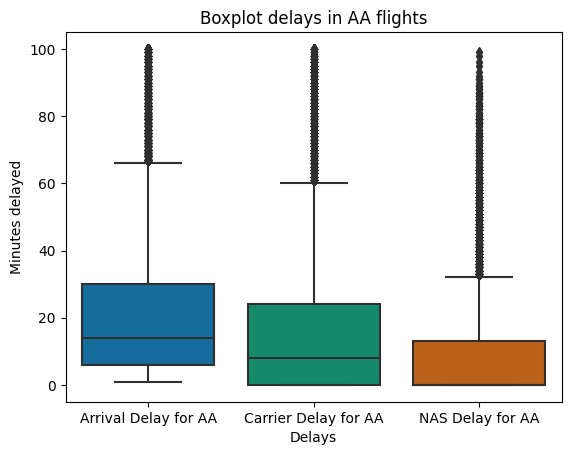

In [70]:
# Okay, now we have the top5 airline with maximum delays
# Lets try to create a box and whisker plot for each delay for these airlines since weather and security are independent features - Im skipping them
# So box and whisker for top5 airlines on arrival delay, carrier delay and NAS delay
bw_AA_df = flight_data_v3[flight_data_v3['arrdelayminutes']>0.0]
bw_AA_df = bw_AA_df[bw_AA_df['reporting_airline']=='AA']
bw_AA_df = bw_AA_df[bw_AA_df['arrdelayminutes']<=100]
bw_AA_data = {
    'Arrival Delay for AA':bw_AA_df[['arrdelayminutes']].values.ravel(),
    'Carrier Delay for AA':bw_AA_df[['carrierdelay']].values.ravel(),
    'NAS Delay for AA':bw_AA_df[['nasdelay']].values.ravel()
}
# bw_AA_df= bw_AA_df[['arrdelayminutes','carrierdelay','nasdelay']]
bw_AA_data
# Create a boxplot using Seaborn
print(bw_AA_data)
final_bw_AA_df = pd.DataFrame(bw_AA_data)
sns.boxplot(data=final_bw_AA_df)

# Add labels and title
plt.xlabel('Delays')
plt.ylabel('Minutes delayed')
plt.title('Boxplot delays in AA flights')

{'Arrival Delay for DL': array([ 6.,  6., 24., ...,  6., 30., 14.]), 'Carrier Delay for DL': array([nan, nan, 24., ..., nan,  0., nan]), 'NAS Delay for DL': array([nan, nan,  0., ..., nan, 30., nan])}


Text(0.5, 1.0, 'Boxplot delays in DL flights')

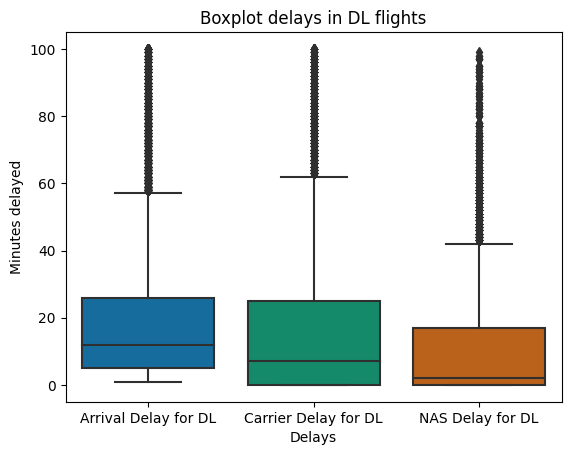

In [71]:
# Okay, now we have the top5 airline with maximum delays
# Lets try to create a box and whisker plot for each delay for these airlines since weather and security are independent features - Im skipping them
# So box and whisker for top5 airlines on arrival delay, carrier delay and NAS delay
bw_DL_df = flight_data_v3[flight_data_v3['arrdelayminutes']>0.0]
bw_DL_df = bw_DL_df[bw_DL_df['reporting_airline']=='DL']
bw_DL_df = bw_DL_df[bw_DL_df['arrdelayminutes']<=100]
bw_DL_data = {
    'Arrival Delay for DL':bw_DL_df[['arrdelayminutes']].values.ravel(),
    'Carrier Delay for DL':bw_DL_df[['carrierdelay']].values.ravel(),
    'NAS Delay for DL':bw_DL_df[['nasdelay']].values.ravel()
}
# bw_DL_df= bw_DL_df[['arrdelayminutes','carrierdelay','nasdelay']]
bw_DL_data
# Create a boxplot using Seaborn
print(bw_DL_data)
final_bw_DL_df = pd.DataFrame(bw_DL_data)
sns.boxplot(data=final_bw_DL_df)

# Add labels and title
plt.xlabel('Delays')
plt.ylabel('Minutes delayed')
plt.title('Boxplot delays in DL flights')

{'Arrival Delay for UA': array([11., 73.,  6., ..., 17.,  2.,  8.]), 'Carrier Delay for UA': array([nan, 73., nan, ...,  0., nan, nan]), 'NAS Delay for UA': array([nan,  0., nan, ..., 17., nan, nan])}


Text(0.5, 1.0, 'Boxplot delays in UA flights')

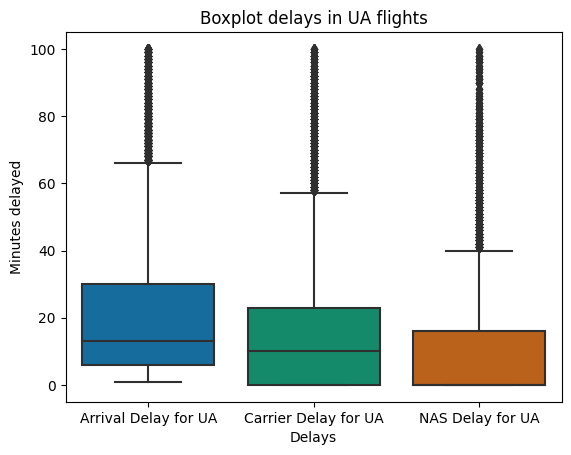

In [72]:
# Okay, now we have the top5 airline with maximum delays
# Lets try to create a box and whisker plot for each delay for these airlines since weather and security are independent features - Im skipping them
# So box and whisker for top5 airlines on arrival delay, carrier delay and NAS delay
bw_UA_df = flight_data_v3[flight_data_v3['arrdelayminutes']>0.0]
bw_UA_df = bw_UA_df[bw_UA_df['reporting_airline']=='UA']
bw_UA_df = bw_UA_df[bw_UA_df['arrdelayminutes']<=100]
bw_UA_data = {
    'Arrival Delay for UA':bw_UA_df[['arrdelayminutes']].values.ravel(),
    'Carrier Delay for UA':bw_UA_df[['carrierdelay']].values.ravel(),
    'NAS Delay for UA':bw_UA_df[['nasdelay']].values.ravel()
}
# bw_UA_df= bw_UA_df[['arrdelayminutes','carrierdelay','nasdelay']]
bw_UA_data
# Create a boxplot using Seaborn
print(bw_UA_data)
final_bw_UA_df = pd.DataFrame(bw_UA_data)
sns.boxplot(data=final_bw_UA_df)

# Add labels and title
plt.xlabel('Delays')
plt.ylabel('Minutes delayed')
plt.title('Boxplot delays in UA flights')

Text(0.5, 1.0, 'Boxplot for carrier delays in most delayed flights')

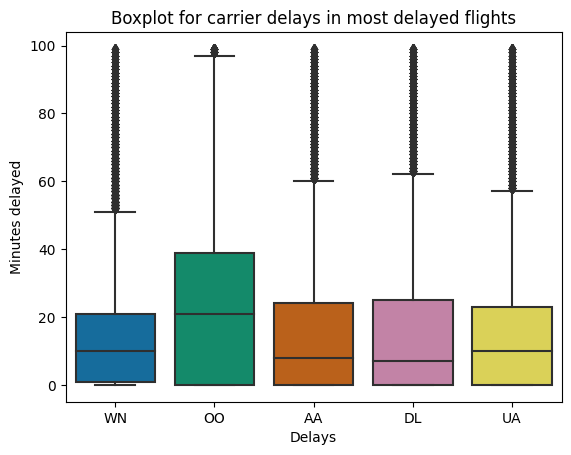

In [73]:
# Arrival delays are almost similar in all plots. So lets compare the carrier delays together
carrier_delay_df = flight_data_v3[flight_data_v3['arrdelayminutes']>0.0]
carrier_delay_df = carrier_delay_df[carrier_delay_df['arrdelayminutes']<100]
carrier_delay_WN_df = carrier_delay_df[carrier_delay_df['reporting_airline']=='WN']
carrier_delay_OO_df = carrier_delay_df[carrier_delay_df['reporting_airline']=='OO']
carrier_delay_AA_df = carrier_delay_df[carrier_delay_df['reporting_airline']=='AA']
carrier_delay_DL_df = carrier_delay_df[carrier_delay_df['reporting_airline']=='DL']
carrier_delay_UA_df = carrier_delay_df[carrier_delay_df['reporting_airline']=='UA']
# print(carrier_delay_WN_df[['carrierdelay']].fillna(0).values.ravel())
carrier_delay_data = np.array([carrier_delay_WN_df[['carrierdelay']].values.ravel().tolist(),
                              carrier_delay_OO_df[['carrierdelay']].values.ravel().tolist(),
                              carrier_delay_AA_df[['carrierdelay']].values.ravel().tolist(),
                              carrier_delay_DL_df[['carrierdelay']].values.ravel().tolist(),
                              carrier_delay_UA_df[['carrierdelay']].values.ravel().tolist()], dtype=object)
# print(carrier_delay_data)
# # {
# #     'Carrier Delay for WN':carrier_delay_WN_df[['carrierdelay']].fillna(0).values.ravel(),
# #     'Carrier Delay for OO':carrier_delay_OO_df[['carrierdelay']].fillna(0).values.ravel(),
# #     'Carrier Delay for AA':carrier_delay_AA_df[['carrierdelay']].fillna(0).values.ravel(),
# #     'Carrier Delay for DL':carrier_delay_DL_df[['carrierdelay']].fillna(0).values.ravel(),
# #     'Carrier Delay for UA':carrier_delay_UA_df[['carrierdelay']].fillna(0).values.ravel(),
# # }

# # final_carrier_delay_df = pd.DataFrame(carrier_delay_data)
sns.boxplot(data=carrier_delay_data)
plt.xticks(range(0, 5), ['WN','OO','AA','DL','UA'])
# Add labels and title
plt.xlabel('Delays')
plt.ylabel('Minutes delayed')
plt.title('Boxplot for carrier delays in most delayed flights')

Text(0.5, 1.0, 'Boxplot for nas delays in most delayed flights')

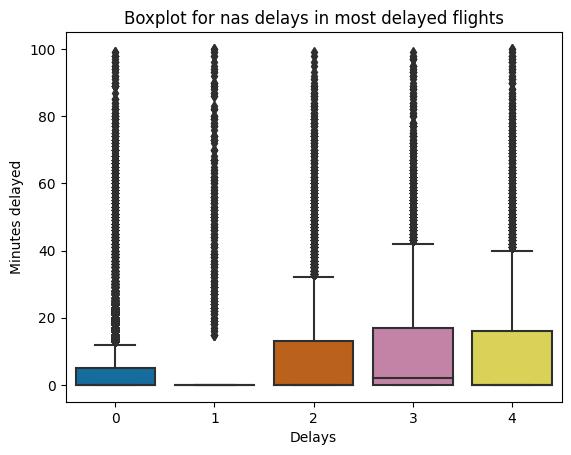

In [74]:
# Arrival delays are almost similar in all plots. So lets compare the nas delays together
carrier_delay_df = flight_data_v3[flight_data_v3['arrdelayminutes']>0.0]
carrier_delay_df = carrier_delay_df[carrier_delay_df['arrdelayminutes']<=100]
carrier_delay_WN_df = carrier_delay_df[carrier_delay_df['reporting_airline']=='WN']
carrier_delay_OO_df = carrier_delay_df[carrier_delay_df['reporting_airline']=='OO']
carrier_delay_AA_df = carrier_delay_df[carrier_delay_df['reporting_airline']=='AA']
carrier_delay_DL_df = carrier_delay_df[carrier_delay_df['reporting_airline']=='DL']
carrier_delay_UA_df = carrier_delay_df[carrier_delay_df['reporting_airline']=='UA']
# print(carrier_delay_WN_df[['carrierdelay']].fillna(0).values.ravel())
carrier_delay_data = np.array([carrier_delay_WN_df[['nasdelay']].values.ravel().tolist(),
                              carrier_delay_OO_df[['nasdelay']].values.ravel().tolist(),
                              carrier_delay_AA_df[['nasdelay']].values.ravel().tolist(),
                              carrier_delay_DL_df[['nasdelay']].values.ravel().tolist(),
                              carrier_delay_UA_df[['nasdelay']].values.ravel().tolist()], dtype=object)
# print(carrier_delay_data)
# # {
# #     'Carrier Delay for WN':carrier_delay_WN_df[['carrierdelay']].fillna(0).values.ravel(),
# #     'Carrier Delay for OO':carrier_delay_OO_df[['carrierdelay']].fillna(0).values.ravel(),
# #     'Carrier Delay for AA':carrier_delay_AA_df[['carrierdelay']].fillna(0).values.ravel(),
# #     'Carrier Delay for DL':carrier_delay_DL_df[['carrierdelay']].fillna(0).values.ravel(),
# #     'Carrier Delay for UA':carrier_delay_UA_df[['carrierdelay']].fillna(0).values.ravel(),
# # }

# # final_carrier_delay_df = pd.DataFrame(carrier_delay_data)
sns.boxplot(data=carrier_delay_data)

# Add labels and title
plt.xlabel('Delays')
plt.ylabel('Minutes delayed')
plt.title('Boxplot for nas delays in most delayed flights')

In [75]:
# Summary stats
summary = arriving_late_by_15_df['averagespeed'].describe().reset_index()
summary.columns = ['Stat', 'Speed']

table = tabulate(summary,headers='keys', tablefmt='pretty')
print(table)

# Yes! Speed it is!

+---+-------+--------------------+
|   | Stat  |       Speed        |
+---+-------+--------------------+
| 0 | count |      18217.0       |
| 1 | mean  | 380.50617555031016 |
| 2 |  std  | 74.19734808057405  |
| 3 |  min  |        48.0        |
| 4 |  25%  |       337.0        |
| 5 |  50%  |       384.0        |
| 6 |  75%  |       429.0        |
| 7 |  max  |       599.0        |
+---+-------+--------------------+


In [76]:
#create carrier total flights df
flight_count_df=flight_data_v3[['reporting_airline']].groupby("reporting_airline").count() #carrier column and group by count
flight_count_df['flight_count']=flight_data_v3['reporting_airline'].value_counts() #total flights
flight_count_df = flight_count_df.reset_index(drop=False) #reset index

#carrier total delays df
carrier_delay_2=(flight_data_v3[flight_data_v3['carrierdelay']>0]['reporting_airline'].value_counts()) #delayed
carrier_delay_2=carrier_delay_2.to_frame(name=('carrier_delay')) #to df
carrier_delay_2.index.name='reporting_airline' #set index name
carrier_delay_2=carrier_delay_2.reset_index(drop=False) #reset index


# Merging all dfs based on reporting airline code
merged_df = pd.merge(flight_count_df, carrier_delay_2, on='reporting_airline', how='outer')

merged_df['percentage_carrier_delay']=round(merged_df['carrier_delay']*100/merged_df['flight_count'],2) #% delay column

merged_df #explore new df

,reporting_airline,flight_count,carrier_delay,percentage_carrier_delay
0,9E,42841,1879,4.39
1,AA,142694,15697,11.00
2,AS,32375,3681,11.37
3,B6,39710,8647,21.78
4,DL,137044,11325,8.26
5,F9,25703,3893,15.15
6,G4,18487,3272,17.70
7,HA,11812,1412,11.95
8,MQ,44846,3408,7.60
9,NK,34403,4342,12.62


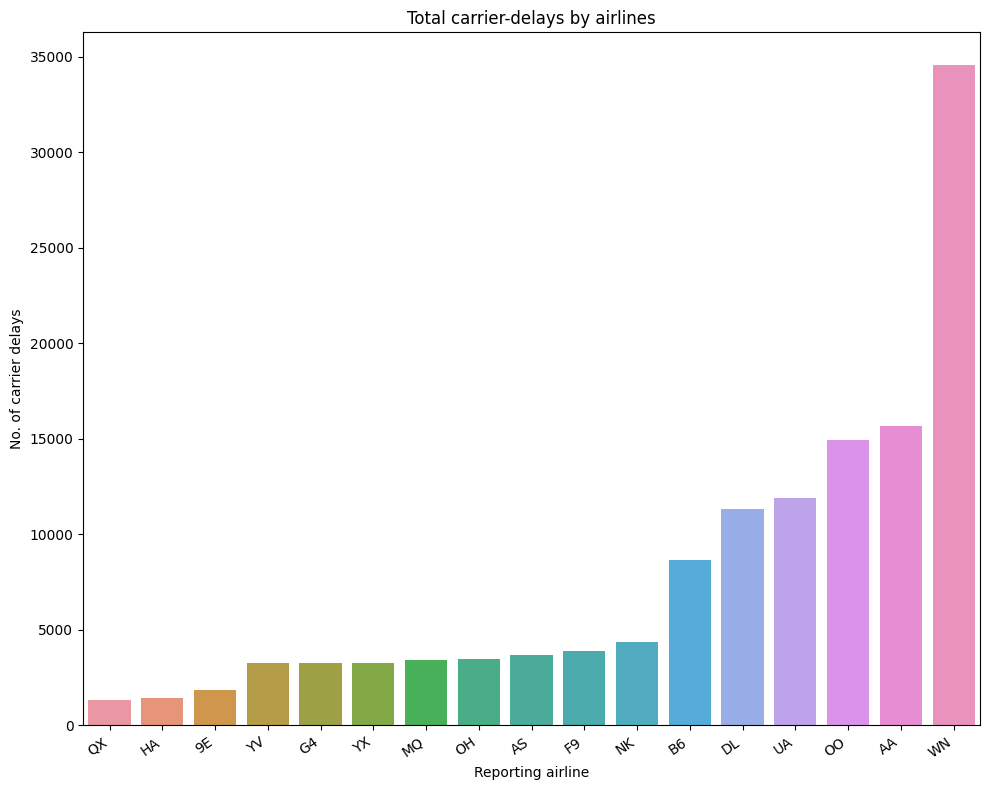

In [77]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= merged_df.sort_values(by='carrier_delay'),ax=ax, x=('reporting_airline'), y=('carrier_delay'))
ax.set_title('Total carrier-delays by airlines')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('Reporting airline')
ax.set_ylabel('No. of carrier delays')
plt.tight_layout() #tight layout
plt.savefig('../graphs/analysis_9.png', bbox_inches='tight')
plt.show() #plot

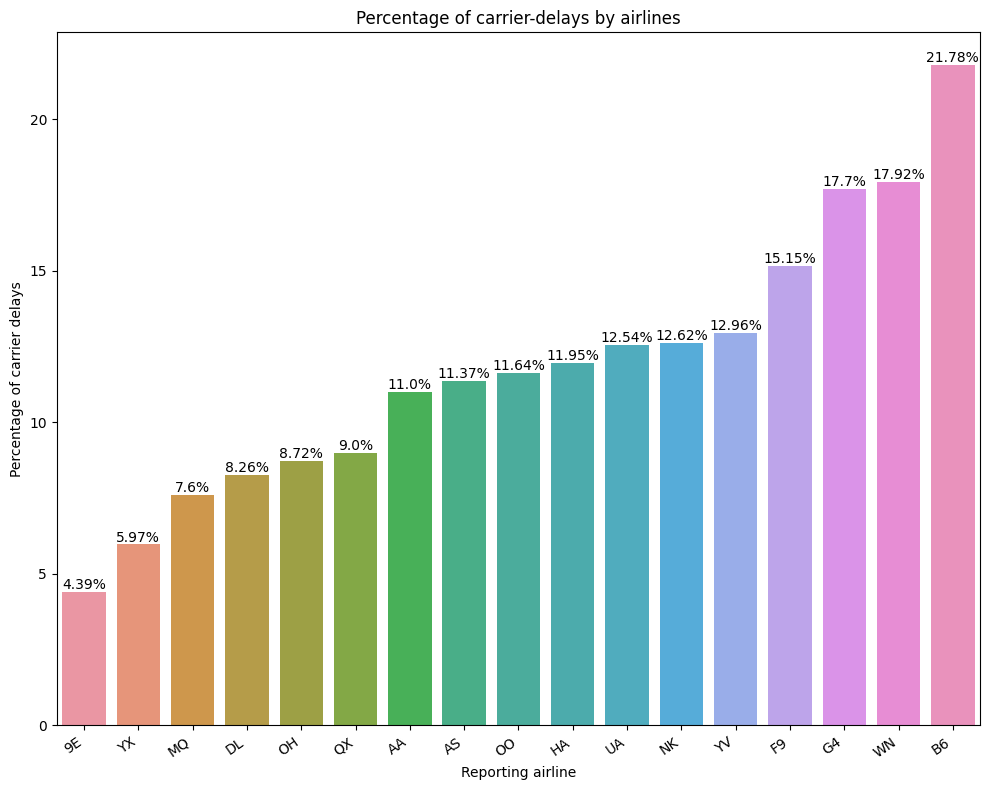

In [78]:
# Plotting percentage of carrier delays by airlines
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= merged_df.sort_values(by='percentage_carrier_delay'),ax=ax, x=('reporting_airline'), y=('percentage_carrier_delay'))
ax.set_title('Percentage of carrier-delays by airlines')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('Reporting airline')
ax.set_ylabel('Percentage of carrier delays')
plt.tight_layout() #tight layout

for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.savefig('../graphs/analysis_10.png', bbox_inches='tight')
plt.show() #plot

In [79]:
# NAS delay with respect to airpot
airport_count_origin_df=flight_data_v3[['origin']].groupby("origin").count() #carrier column and group by count
airport_count_origin_df['flight_count_origin']=flight_data_v3['origin'].value_counts() #total flights

airport_count_origin_df = airport_count_origin_df.reset_index(drop=False) #reset index
airport_count_origin_df.rename(columns={'origin': 'airport_code'}, inplace=True)

airport_count_dest_df=flight_data_v3[['dest']].groupby("dest").count() #carrier column and group by count
airport_count_dest_df['flight_count_dest']=flight_data_v3['dest'].value_counts() #total flights

airport_count_dest_df = airport_count_dest_df.reset_index(drop=False) #reset index
airport_count_dest_df.rename(columns={'dest': 'airport_code'}, inplace=True)

nas_delay_origin = (flight_data_v3[flight_data_v3['nasdelay']>0]['origin'].value_counts()) #delayed
nas_delay_origin = nas_delay_origin.to_frame(name=('nas_delay_origin')) #to df

nas_delay_origin.index.name='origin' #set index name

nas_delay_origin = nas_delay_origin.reset_index(drop=False) #reset index
nas_delay_origin.rename(columns={'origin': 'airport_code'}, inplace=True)

nas_delay_dest = (flight_data_v3[flight_data_v3['nasdelay']>0]['dest'].value_counts()) #delayed
nas_delay_dest = nas_delay_dest.to_frame(name=('nas_delay_dest')) #to df

nas_delay_dest.index.name='dest' #set index name

nas_delay_dest = nas_delay_dest.reset_index(drop=False) #reset index
nas_delay_dest.rename(columns={'dest': 'airport_code'}, inplace=True)

#Merging all datframe based on airport code
merged_df = pd.merge(airport_count_origin_df, airport_count_dest_df, on='airport_code',how='outer')
merged_df = pd.merge(merged_df, nas_delay_origin, on='airport_code',how='outer')
merged_df = pd.merge(merged_df, nas_delay_dest, on='airport_code',how='outer')

merged_df['total_flight_count'] = merged_df['flight_count_origin'] + merged_df['flight_count_dest']

In [80]:
merged_df = merged_df.fillna(0)
merged_df['total_nas_delay'] = merged_df['nas_delay_origin'] + merged_df['nas_delay_dest']

In [81]:
merged_df

,airport_code,flight_count_origin,flight_count_dest,nas_delay_origin,nas_delay_dest,total_flight_count,total_nas_delay
0,ABE,730,731,41.0,61.0,1461,102.0
1,ABI,336,336,45.0,11.0,672,56.0
2,ABQ,3171,3185,167.0,130.0,6356,297.0
3,ABR,128,130,0.0,0.0,258,0.0
4,ABY,156,156,5.0,11.0,312,16.0
...,...,...,...,...,...,...,...
358,XNA,1686,1677,92.0,90.0,3363,182.0
359,XWA,228,229,1.0,0.0,457,1.0
360,YAK,86,91,13.0,15.0,177,28.0
361,YKM,111,111,9.0,11.0,222,20.0


In [82]:
#Calculating percentage
merged_df['percentage_nas'] = round((merged_df['total_nas_delay']*100)/merged_df['total_flight_count'],2)

In [83]:
# Sort the DataFrame by column 'A' in ascending order
merged_df = merged_df.sort_values(by='percentage_nas', ascending=False)
merged_df
merged_df_plot = merged_df.head(15)

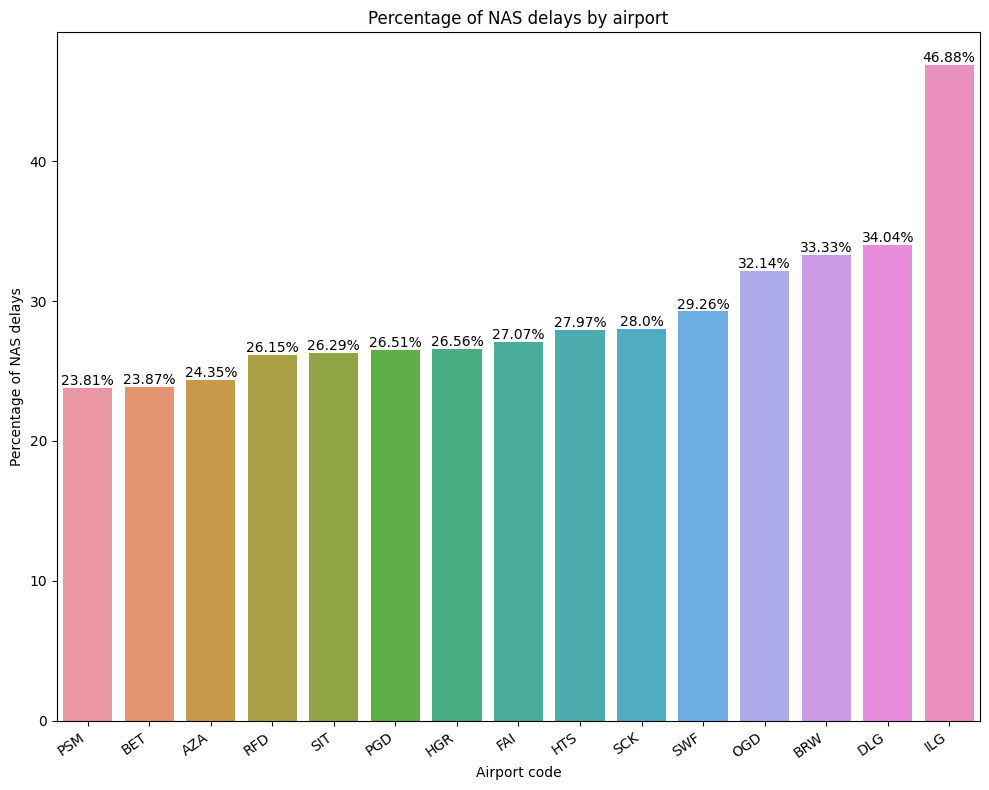

In [84]:
#Plotting percentage of NAS delay by airport
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= merged_df_plot.sort_values(by='percentage_nas'),ax=ax, x=('airport_code'), y=('percentage_nas'))
ax.set_title('Percentage of NAS delays by airport')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('Airport code')
ax.set_ylabel('Percentage of NAS delays')
plt.tight_layout() #tight layout

for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.savefig('../graphs/analysis_11.png', bbox_inches='tight')
plt.show() #plot

## Done with delay! Some general stats.

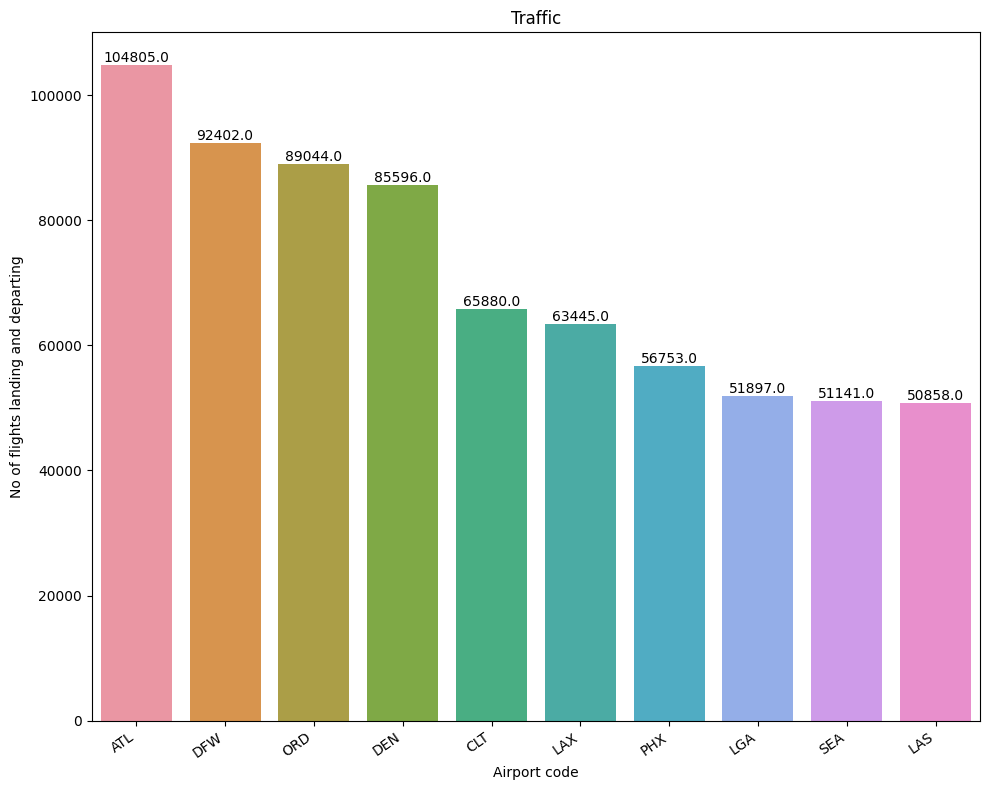

In [85]:
# Flights by airport - Busiest airport
total_flights_by_airport_df = pd.merge(airport_count_origin_df, airport_count_dest_df, on='airport_code',how='outer')
total_flights_by_airport_df['total_flights'] = total_flights_by_airport_df['flight_count_origin'] + total_flights_by_airport_df['flight_count_dest']
total_flights_by_airport_df = total_flights_by_airport_df.sort_values(by='total_flights', ascending=False)
total_flights_by_airport_df_v1 = total_flights_by_airport_df.head(10)

# Plotting graph
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= total_flights_by_airport_df_v1, x=('airport_code'), y=('total_flights'))
ax.set_title('Traffic')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('Airport code')
ax.set_ylabel('No of flights landing and departing')
plt.tight_layout() #tight layout

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.savefig('../graphs/analysis_12.png', bbox_inches='tight')
plt.show() #plot
# Total flight by carriers



In [86]:
total_flights_by_airport_df['total_flights'].sum()

2161168

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\620262184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busiest_airport_2022['percentage'] = round(busiest_airport_2022['total_flights']*100/total_flights_by_airport_df['total_flights'].sum(),2)


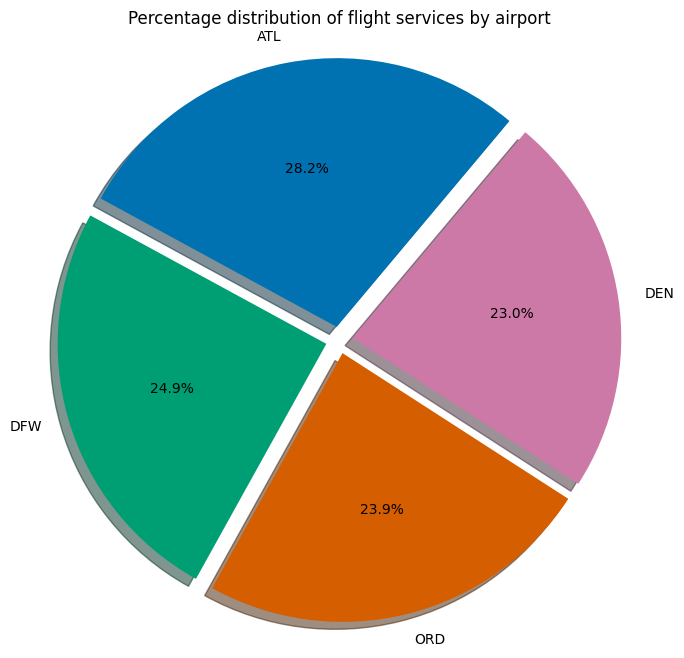

In [87]:
# Percentage of market
busiest_airport_2022 = total_flights_by_airport_df.head(4)
busiest_airport_2022['percentage'] = round(busiest_airport_2022['total_flights']*100/total_flights_by_airport_df['total_flights'].sum(),2)
busiest_airport_2022
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(busiest_airport_2022['percentage'], labels=busiest_airport_2022['airport_code'],explode = [0.05, 0.05, 0.05, 0.05],shadow=True, autopct='%1.1f%%', startangle=50)
plt.title('Percentage distribution of flight services by airport')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.savefig('../graphs/analysis_13.png', bbox_inches='tight')
# Show the pie chart
plt.show()

In [88]:
# Total flights by carrier
airline_count_df=flight_data_v3[['reporting_airline']].groupby("reporting_airline").count() #carrier column and group by count
airline_count_df['flight_count_origin']=flight_data_v3['reporting_airline'].value_counts() #total flights
airline_count_df = airline_count_df.reset_index(drop=False) #reset index
airline_count_df.rename(columns={'reporting_airline': 'airline_code'}, inplace=True)
airline_count_df['percentage'] = round((airline_count_df['flight_count_origin']*100)/airline_count_df['flight_count_origin'].sum(),2)
airline_count_df

,airline_code,flight_count_origin,percentage
0,9E,42841,3.96
1,AA,142694,13.21
2,AS,32375,3.00
3,B6,39710,3.67
4,DL,137044,12.68
5,F9,25703,2.38
6,G4,18487,1.71
7,HA,11812,1.09
8,MQ,44846,4.15
9,NK,34403,3.18


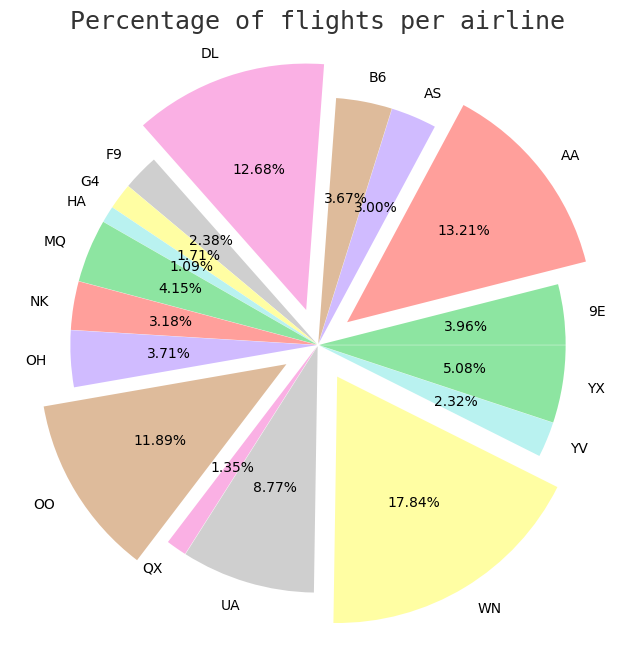

In [89]:
#pie chart
f, ax = plt.subplots(figsize=(10, 8))
explode = [0.005, 0.15,0.005,0.005,0.15,0.005,0.005,0.005,0.005,0.005,0.005,0.15,0.005,0.005,0.15,0.005,0.005] #explode september
#create pie chart
plt.pie(airline_count_df['percentage'], labels= airline_count_df['airline_code'], colors = sns.color_palette('pastel')[2:13], 
        explode = explode, autopct='%.2f%%') #plot
plt.title('Percentage of flights per airline', fontsize=18, fontname="Monospace", alpha=.8) #title
plt.savefig('../graphs/Q1_3_plot1.png', bbox_inches='tight') #save to png
plt.savefig('../graphs/analysis_14.png', bbox_inches='tight')
plt.show() #plot

In [90]:
# Total flight by week - Christmas and new year statistics
def date_to_week(date_str):
    # Converting the date string to a datetime object
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')  

    # strftime method to extract the week number
    week_number = date_obj.strftime('%U')

    return int(week_number)

In [91]:
flight_data_v3.keys()

Index(['month', 'dayofweek', 'flightdate', 'reporting_airline', 'origin',
       'originstatename', 'dest', 'deststatename', 'crsdeptime', 'deptime',
       'depdelay', 'depdelayminutes', 'depdel15', 'taxiout', 'taxiin',
       'crsarrtime', 'arrtime', 'arrdelay', 'arrdelayminutes', 'arrdel15',
       'crselapsedtime', 'actualelapsedtime', 'airtime', 'distance',
       'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay',
       'lateaircraftdelay', 'totaldelay', 'totaldelay15', 'Route',
       'averagespeed'],
      dtype='object')

In [92]:
# Total flight by week - Christmas and new year statistics
daily_stats_df=flight_data_v3[['flightdate']].groupby("flightdate").count() #carrier column and group by count
daily_stats_df['flight_count']=flight_data_v3['flightdate'].value_counts() #total flights
daily_stats_df = daily_stats_df.reset_index(drop=False) #reset index
daily_stats_df

,flightdate,flight_count
0,2021-11-01,18362
1,2021-11-02,16932
2,2021-11-03,17737
3,2021-11-04,19394
4,2021-11-05,19319
5,2021-11-06,16341
6,2021-11-07,18665
7,2021-11-08,18928
8,2021-11-09,16870
9,2021-11-10,17342


In [93]:
daily_stats_df

,flightdate,flight_count
0,2021-11-01,18362
1,2021-11-02,16932
2,2021-11-03,17737
3,2021-11-04,19394
4,2021-11-05,19319
5,2021-11-06,16341
6,2021-11-07,18665
7,2021-11-08,18928
8,2021-11-09,16870
9,2021-11-10,17342


In [94]:
# Creating weekly statistics dataframe
weekly_stats_df = pd.DataFrame()
weekly_stats_df = daily_stats_df.copy()
#Converting date to week number
weekly_stats_df['week_number'] = daily_stats_df['flightdate'].apply(date_to_week)
weekly_stats_df = weekly_stats_df.drop(['flightdate'], axis=1)
weekly_stats_df = weekly_stats_df.groupby('week_number').agg({'flight_count': 'mean'}).reset_index()

# Display the grouped DataFrame with the sums
print(weekly_stats_df)

   week_number  flight_count
0           44  18014.166667
1           45  17999.428571
2           46  18298.571429
3           47  17581.428571
4           48  18367.142857
5           49  17365.714286
6           50  17650.142857
7           51  17381.428571
8           52  16665.333333


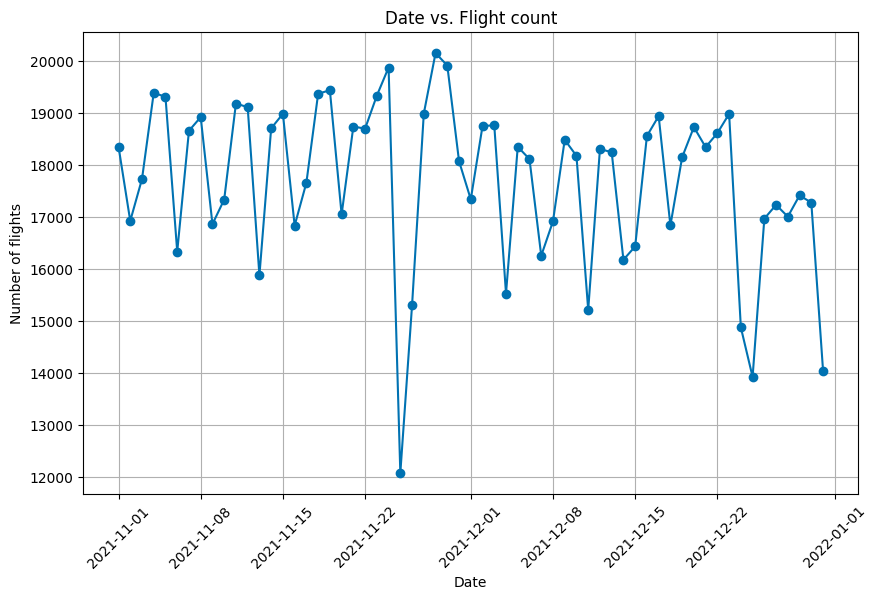

In [95]:
# Adding labels
daily_stats_df_tmp = daily_stats_df.copy()
daily_stats_df_tmp['flightdate'] = pd.to_datetime(daily_stats_df['flightdate'])

# # Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(daily_stats_df_tmp['flightdate'], daily_stats_df_tmp['flight_count'], marker='o', linestyle='-')
plt.title('Date vs. Flight count')
plt.xlabel('Date')
plt.ylabel('Number of flights')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.savefig('../graphs/analysis_15.png', bbox_inches='tight')
plt.show()

In [96]:
daily_stats_df_tmp.describe()

,flightdate,flight_count
count,61,61.000000
mean,2021-12-01 00:00:00,17714.491803
min,2021-11-01 00:00:00,12084.000000
25%,2021-11-16 00:00:00,16923.000000
50%,2021-12-01 00:00:00,18183.000000
75%,2021-12-16 00:00:00,18771.000000
max,2021-12-31 00:00:00,20159.000000
std,NaN,1604.551003


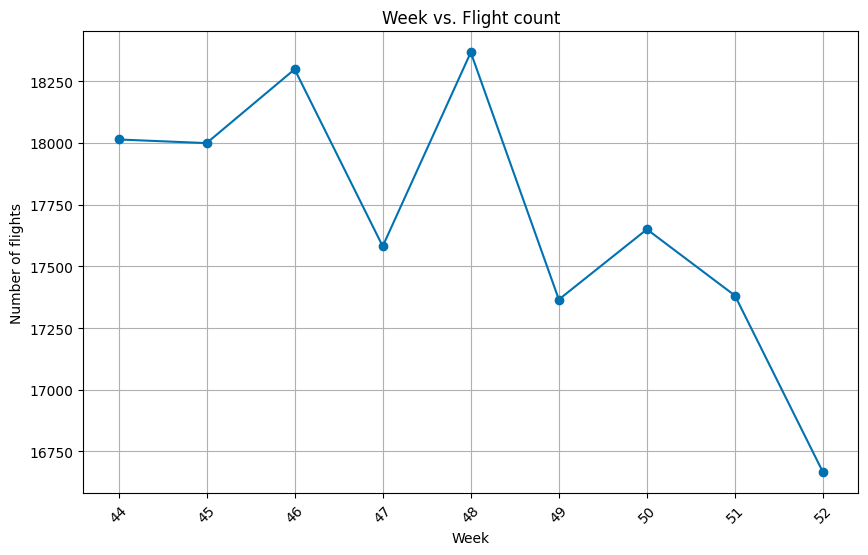

In [97]:
weekly_stats_df_tmp = weekly_stats_df.copy()
# weekly_stats_df_tmp['flightdate'] = pd.to_datetime(weekly_stats_df['flightdate'])

# # Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(weekly_stats_df_tmp['week_number'], weekly_stats_df_tmp['flight_count'], marker='o', linestyle='-')
plt.title('Week vs. Flight count')
plt.xlabel('Week')
plt.ylabel('Number of flights')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.savefig('../graphs/analysis_16.png', bbox_inches='tight')
plt.show()

In [98]:
# Busiest city - Where people go to celebrate Xmas/Newyear 23-12-2021 to 31-12-2021

# Create dataframe and convert flight date to week number
destination_busy_tmp_df = flight_data_v2.copy()
destination_busy_tmp_df['Week'] = flight_data_v2['flightdate'].apply(date_to_week)
# Selecting the required week
destination_busy_tmp_df = destination_busy_tmp_df[(destination_busy_tmp_df['Week']>=46) & (destination_busy_tmp_df['Week']<49)]

# Grouping and counting by destination-city name
destination_busy_df=destination_busy_tmp_df[['destcityname']].groupby('destcityname').count() #carrier column and group by count
destination_busy_df['flight_count']=destination_busy_tmp_df['destcityname'].value_counts() #total flights
destination_busy_df = destination_busy_df.reset_index(drop=False) #reset index

destination_busy_df = destination_busy_df.sort_values(by='flight_count', ascending=False)
destination_busy_df = destination_busy_df.head(10)


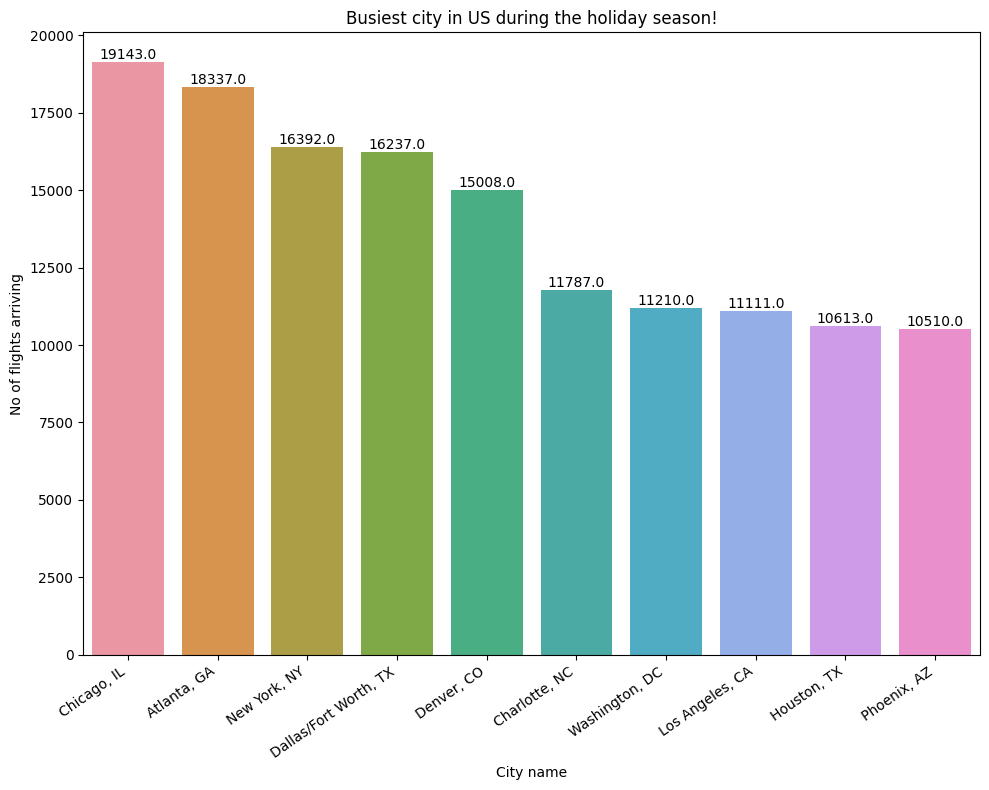

In [99]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= destination_busy_df, x=('destcityname'), y=('flight_count'))
ax.set_title('Busiest city in US during the holiday season!')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('City name')
ax.set_ylabel('No of flights arriving')
plt.tight_layout() #tight layout

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.savefig('../graphs/analysis_17.png', bbox_inches='tight')
plt.show() #plot
# Total flight by carriers

In [101]:
# Cancellation stats
cancellation_code_data = pd.read_csv('../data/cancellation_codes.csv')

# Grouping and counting by cancellation code
cancellation_stats = pd.DataFrame(flight_data['cancellationcode'].value_counts().reset_index())
cancellation_stats.columns = ['Code', 'Count']
#Merging data from another csv
cancellation_stats = pd.merge(cancellation_stats, cancellation_code_data, how='outer', on='Code')
#Percentage calculation
cancellation_stats['percentage'] = round(cancellation_stats['Count']*100/cancellation_stats['Count'].sum(),2)

In [102]:
cancellation_stats

,Code,Count,Description,percentage
0,A,10880,Carrier,64.94
1,B,5458,Weather,32.58
2,C,408,National Air System,2.44
3,D,7,Security,0.04


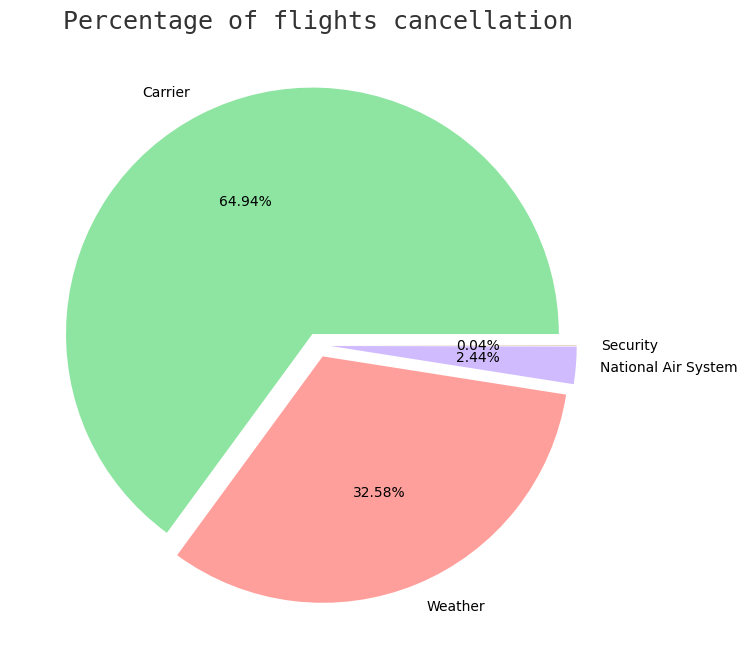

In [103]:
#pie chart
f, ax = plt.subplots(figsize=(10, 8))
explode = [0.05,0.05,0.05,0.05] #explode carrier and weather
#create pie chart
plt.pie(cancellation_stats['percentage'], labels= cancellation_stats['Description'], colors = sns.color_palette('pastel')[2:13], 
        explode = explode, autopct='%.2f%%') #plot
plt.title('Percentage of flights cancellation', fontsize=18, fontname="Monospace", alpha=.8) #title
# plt.savefig('../graphs/Q1_3_plot1.png', bbox_inches='tight') #save to png
plt.savefig('../graphs/analysis_18.png', bbox_inches='tight')
plt.show() #plot

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5052\3800969977.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) #yticks in percentage


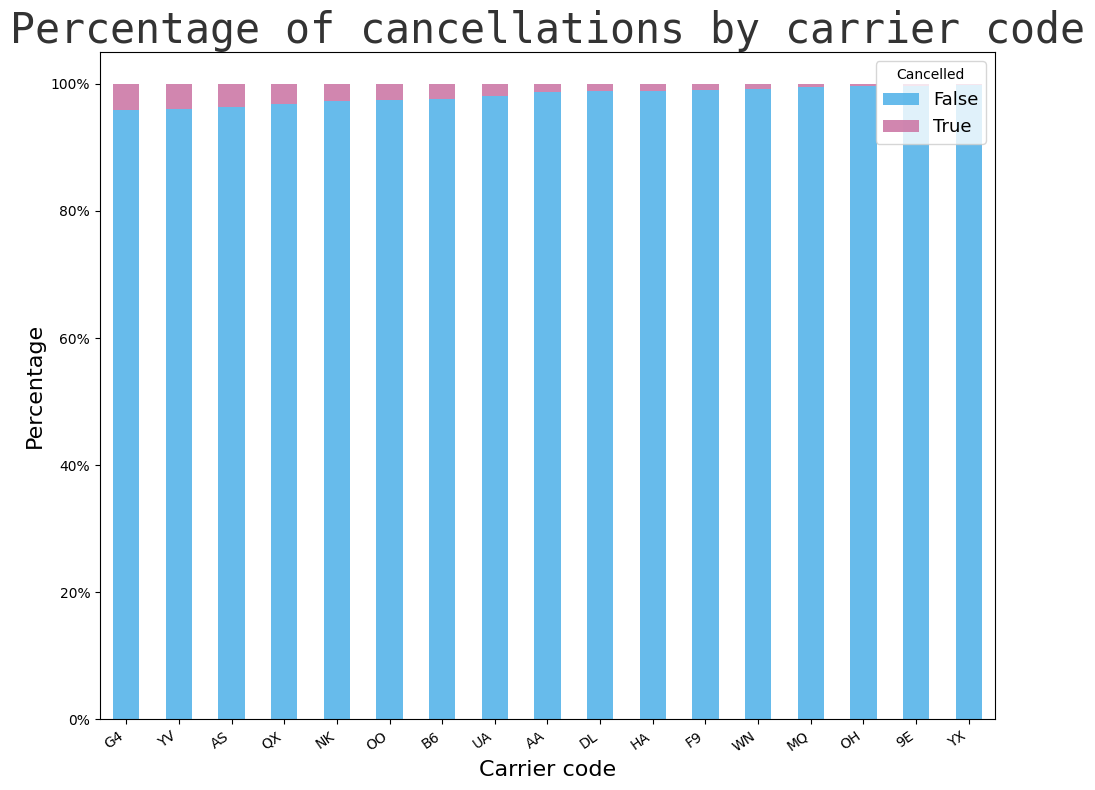

In [104]:
# # Cancellation of flights percentage 
cancellation_plot = pd.DataFrame() #empty df
cancellation_plot['Carrier_code']=flight_data['reporting_airline'] 
cancellation_plot['cancelled']=flight_data['cancelled']==1 
cancellation_plot = cancellation_plot.groupby(['Carrier_code','cancelled']).size().unstack(1) #shape and class data
cancellation_plot = cancellation_plot.div(cancellation_plot.sum(axis=1), axis=0) #percentage

#plot
f, ax = plt.subplots(figsize=(10, 8))
cancellation_plot.sort_values(by=False).plot(kind="bar", alpha=.9, stacked=True, ax=ax,color = palette) #stacked bar plot
#set labels
ax.set_title("Percentage of cancellations by carrier code",fontsize = 30, fontname="Monospace", alpha=.8) #title
plt.xlabel('Carrier code', fontsize = 16) #xlabel
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
plt.ylabel("Percentage", fontsize = 16) #ylabel
ax.legend(loc='upper right', title='Cancelled', fontsize = 13)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) #yticks in percentage
plt.tight_layout(rect=[0, 0, 1, 1]) #tight rectangular layout
# plt.savefig('../graphs/EDA_plot3.png', bbox_inches='tight') #save img
plt.savefig('../graphs/analysis_19.png', bbox_inches='tight')
plt.show() #plot


In [105]:
# Assuming the average capacity of flight is 100 and the average emissions in 90kg per passenger per hour
emission_df = pd.DataFrame()
emission_df = flight_data_v3[['reporting_airline','airtime']]
emission_df = emission_df.reset_index()
# Calculating average airtime per flight
emission_grouped_df = emission_df.groupby('reporting_airline').agg({'airtime': 'mean'})
emission_grouped_df = emission_grouped_df.reset_index()
emission_grouped_df = emission_grouped_df.sort_values(by='airtime', ascending=False)

In [106]:
emission_grouped_df['total_emissions'] = emission_grouped_df['airtime']*90*100
emission_grouped_df.head(4)

,reporting_airline,airtime,total_emissions
2,AS,185.489112,1.669402e+06
13,UA,156.866596,1.411799e+06
3,B6,156.181440,1.405633e+06
9,NK,138.831584,1.249484e+06


In [ ]:
# Trying out pygwalker
import pygwalker as pyg
walker = pyg.walk(flight_data[:50])